# Importación de librerías

In [1]:
%pip install openpyxl
%pip install pandas matplotlib seaborn
%pip install numpy
%pip install dotenv

In [2]:
import pandas as pd
from dotenv import dotenv_values
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.widgets import Slider
import re
from matplotlib.patches import Patch


# Guardar el excel con rendimientos

---

In [3]:
excel_file = "rendimientos.xlsx"

# Load all sheets into a dictionary of DataFrames
dfs = pd.read_excel(excel_file, sheet_name=None, engine="openpyxl")

# 1: Algoritmos clásicos de Intercambio de clave

**Métricas**

* Time per op (s): Tiempo promedio para calcular la clave compartida usando la clave privada propia y la clave pública de la contraparte (en segundos).

* Ops per second: Cantidad de intercambios de claves que pueden realizarse por segundo.

##1.1. Finite Field Diffie-Hellman
**Algoritmo**: Finite Field Diffie-Hellman (FFDH)

**Función**: Intercambio de claves (Key Exchange)

**Descripción**:
FFDH es una variante clásica del algoritmo de intercambio de claves Diffie-Hellman, basada en exponentiación modular en campos finitos. Se utiliza en entornos donde se requiere el establecimiento de claves simétricas seguras a través de canales inseguros.
El tamaño de la clave (2048, 3072, etc.) se refiere al número de bits del módulo primo utilizado en la operación.
Aunque FFDH ha sido ampliamente usado en TLS tradicional, ha sido progresivamente reemplazado por ECDH y algoritmos post-cuánticos, debido a su menor eficiencia computacional y mayores requerimientos de tamaño de clave para niveles equivalentes de seguridad.


### Procesamiento.

In [4]:
df_ffdh = dfs["ffdh"]
df_ffdh.head(5)

,Algoritmo,Operation Time (s),Ops per second
0,2048 bits ffdh,0.0003,3715.8
1,3072 bits ffdh,0.0007,1491.7
2,4096 bits ffdh,0.0014,729.3
3,6144 bits ffdh,0.0034,297.4
4,8192 bits ffdh,0.0063,157.7


In [5]:
# Procesar df_ffdh
df_ffdh['Bits'] = df_ffdh['Algoritmo'].str.extract(r'(\d+)').astype(int)
df_ffdh['Familia'] = 'FFDH'
df_ffdh['Algoritmo'] = 'Finite Fields Diffie Helman'
df_ffdh['Curva'] = None
df_ffdh.head(10)

,Algoritmo,Operation Time (s),Ops per second,Bits,Familia,Curva
0,Finite Fields Diffie Helman,0.0003,3715.8,2048,FFDH,None
1,Finite Fields Diffie Helman,0.0007,1491.7,3072,FFDH,None
2,Finite Fields Diffie Helman,0.0014,729.3,4096,FFDH,None
3,Finite Fields Diffie Helman,0.0034,297.4,6144,FFDH,None
4,Finite Fields Diffie Helman,0.0063,157.7,8192,FFDH,None


### Gráficas.

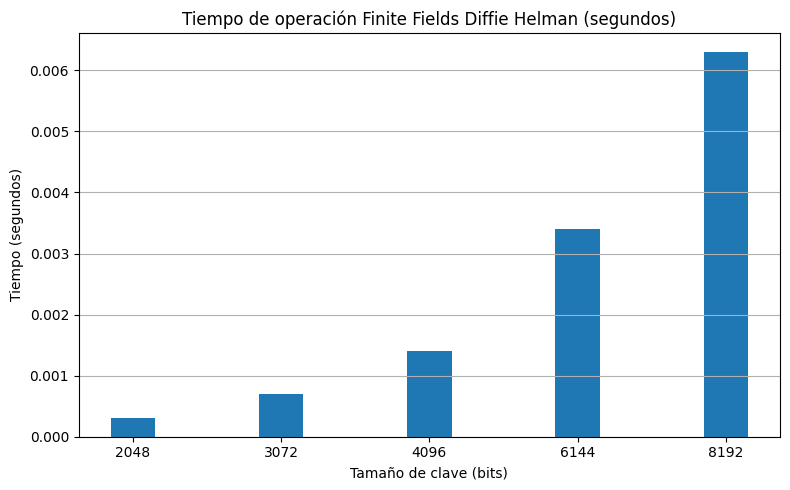

In [6]:
x = np.arange(len(df_ffdh['Bits']))
width = 0.3  # Ancho de la barra

plt.figure(figsize=(8, 5))

# Barra de 'sign'
plt.bar(x, df_ffdh['Operation Time (s)'], width)


plt.xlabel('Tamaño de clave (bits)')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo de operación Finite Fields Diffie Helman (segundos)')
plt.xticks(x, df_ffdh['Bits'])

plt.grid(axis='y')
plt.tight_layout()
plt.show()

---

## 1.2.Elliptic Curve Diffie-Hellman

* **Algoritmo**: Elliptic Curve Diffie-Hellman (ECDH)

* **Función**: Intercambio de claves (Key Exchange)

* **Descripción**:
Esta tabla muestra el rendimiento del algoritmo ECDH (Elliptic Curve Diffie-Hellman) usando diversas curvas elípticas, tanto clásicas como modernas. Se utiliza principalmente para generar una clave compartida segura entre dos partes, en TLS.

Las curvas se diferencian por el tamaño de clave (en bits) y la familia o estándar que las define (NIST, Brainpool, X25519/X448). El tamaño de clave afecta directamente la seguridad (aproximadamente la mitad del tamaño en bits debido a la complejidad del problema del logaritmo discreto en curvas elípticas) y el rendimiento.

**Curvas utilizadas**

* NIST:

nistpXXX: Curvas sobre campos primos (más comunes).

nistkXXX: Curvas Koblitz sobre campos binarios, optimizadas para eficiencia.

nistbXXX: Curvas binarias no-Koblitz, también sobre campos binarios.

* Brainpool:

Curvas propuestas por el grupo alemán Brainpool, orientadas a mayor transparencia en su generación.

Se usó brainpool___r1 (random) como representante de la familia Brainpool, por ser la curva estándar y más ampliamente utilizada en la práctica.

brainpool___t1 (twisted) es una curva torcida, diseñada con una estructura matemática ligeramente diferente. Puede tener aplicaciones teóricas o específicas, pero no es comúnmente usad ya que no ofrece ventajas significativas de seguridad. Por ello no se tiene en cuenta para las comparativas siguientes.

* Curvas modernas:

X25519 (253 bits) y X448 (448 bits): Curvas modernas recomendadas para nuevas implementaciones de ECDH. Ofrecen excelente rendimiento y fuerte seguridad sin depender de NIST.


### Procesamiento.

In [7]:
df_ecdh = dfs["ecdh"]
df_ecdh.head(5)

,Algoritmo,Operation Time (s),Ops per second
0,160 bits ecdh (secp160r1),0.0002,6536.1
1,192 bits ecdh (nistp192),0.0002,5176.2
2,224 bits ecdh (nistp224),0.0003,3537.7
3,256 bits ecdh (nistp256),0.0000,21321.0
4,384 bits ecdh (nistp384),0.0008,1278.4


In [8]:
# Procesar df_ecdh
df_ecdh['Bits'] = df_ecdh.iloc[:, 0].str.extract(r'(\d+)').astype(int)
df_ecdh['Algoritmo'] = df_ecdh.iloc[:, 0].str.extract(r'\(([^)]+)\)')
df_ecdh['Familia'] = 'ECDH'
# Eliminar curvas que terminan en 't1' y hacer copia para evitar warning
df_ecdh = df_ecdh[~df_ecdh['Algoritmo'].str.endswith('t1', na=False)].copy()

# Extraer tipo de curva
patron = r'(nistk|nistb|nistp|brainpool|X448|X25519|secp)'
df_ecdh['Curva'] = df_ecdh['Algoritmo'].str.extract(patron)

# Crear columna con bits por intervalos
bins = [159, 192, 283, 384, 448, 571]  # Límites de los grupos
labels = ['160–192', '224–283', '384', '409–448', '512–571']  # Etiquetas
df_ecdh['Grupo bits'] = pd.cut(df_ecdh['Bits'], bins=bins, labels=labels)
df_ecdh["Algoritmo"] = df_ecdh["Algoritmo"].replace("secp160r1", "nistp160")

# Ordenar y reorganizar columnas
df_ecdh = df_ecdh.sort_values(by=['Curva','Bits'])


### Gráficas.

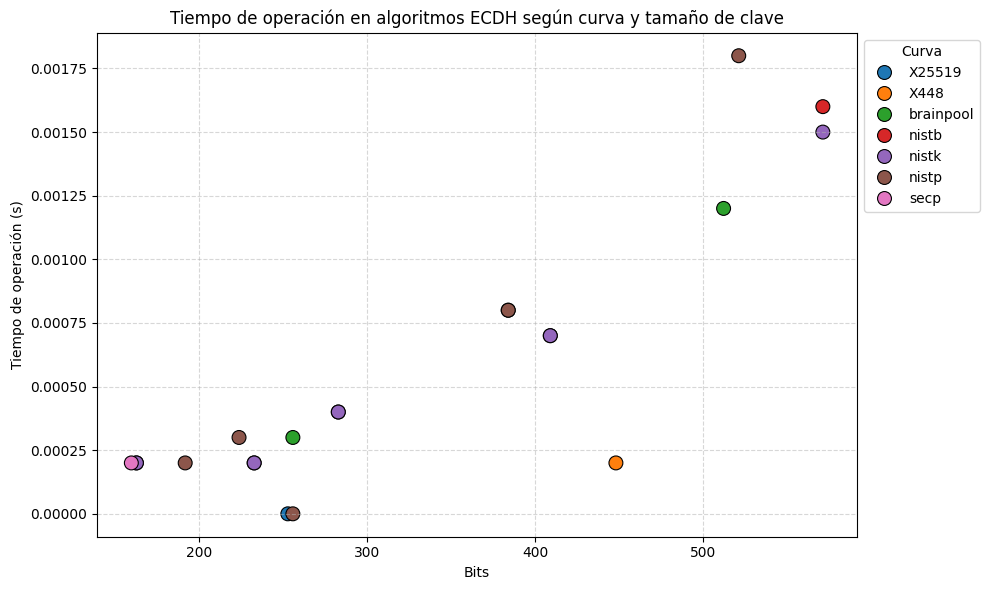

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_ecdh,
    x='Bits',
    y='Operation Time (s)',
    hue='Curva',
    palette='tab10',  # paleta de colores distinta para hasta 10 curvas
    s=100,            # tamaño de los puntos
    edgecolor='k'     # borde negro para destacar los puntos
)

plt.xlabel('Bits')
plt.ylabel('Tiempo de operación (s)')

plt.title('Tiempo de operación en algoritmos ECDH según curva y tamaño de clave')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Curva', loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

## 1.3. Comparativa Bits de Seguridad

In [10]:
def estimate_security_bits(row):
    algoritmo = row["Algoritmo"]
    bits = row["Bits"]

    ecc_strengths = {
        "nistp160": 80,
        "nistp256": 128,
        "nistp384": 192,
        "nistp521": 256,
        "X25519": 128,
        "X448": 224,
        "brainpoolP160r1": 80,
        "brainpoolP192r1": 96,
        "brainpoolP224r1": 112,
        "brainpoolP256r1": 128,
        "brainpoolP320r1": 160,
        "brainpoolP384r1": 192,
        "brainpoolP512r1": 256
    }

    if algoritmo in ecc_strengths:
        return ecc_strengths[algoritmo]

    if "Finite Fields Diffie Helman" in algoritmo:
        if bits == 2048:
            return 112
        elif bits == 3072:
            return 128
        elif bits == 4096:
            return 152
        elif bits == 6144:
            return 176
        elif bits == 8192:
            return 200

    # Estimación general por tamaño (fallback)
    if bits < 192:
        return 80
    elif 192 <= bits < 224:
        return 96
    elif 224 <= bits < 256:
        return 112
    elif 256 <= bits < 384:
        return 128
    elif 384 <= bits < 512:
        return 192
    elif bits >= 512:
        return 256

    return None


In [11]:
df_key_exchange = pd.concat([df_ecdh, df_ffdh], ignore_index=True)
df_key_exchange["Algoritmo"] = df_key_exchange["Algoritmo"].replace("secp160r1", "nistp160")
df_key_exchange["Bits de seguridad"] = df_key_exchange.apply(estimate_security_bits, axis=1)
df_key_exchange.head(5)

,Algoritmo,Operation Time (s),Ops per second,Bits,Familia,Curva,Grupo bits,Bits de seguridad
0,X25519,0.0000,31223.3,253,ECDH,X25519,224–283,128
1,X448,0.0002,6331.0,448,ECDH,X448,409–448,224
2,brainpoolP256r1,0.0003,3171.5,256,ECDH,brainpool,224–283,128
3,brainpoolP384r1,0.0008,1227.8,384,ECDH,brainpool,384,192
4,brainpoolP512r1,0.0012,843.0,512,ECDH,brainpool,512–571,256


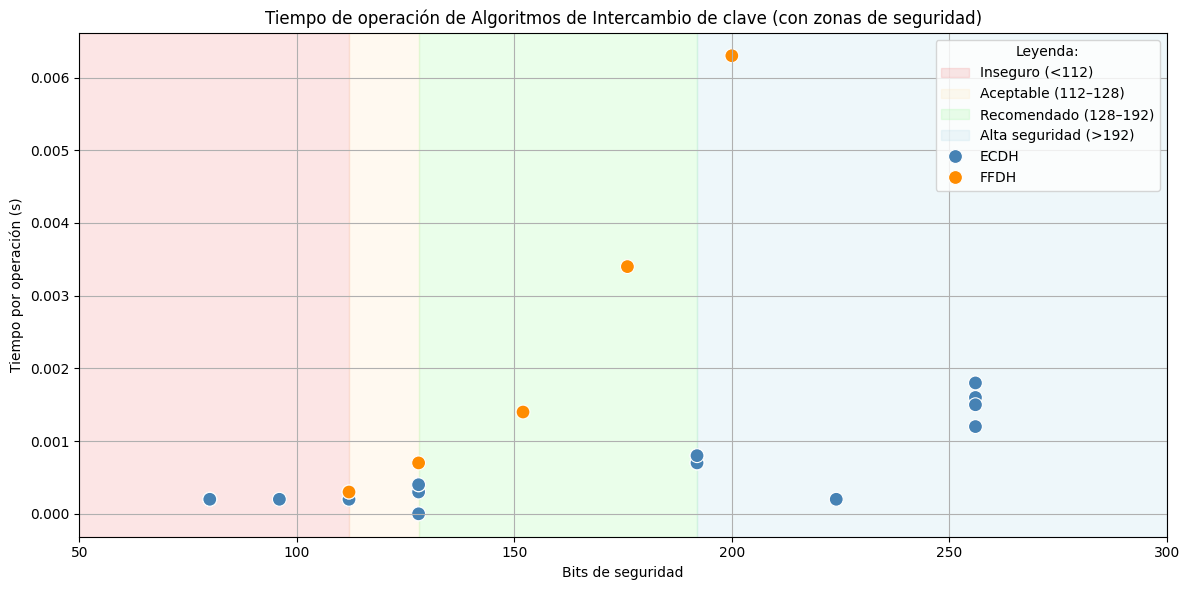

In [12]:


# (4) Graficar con fondo de colores por rango de seguridad
plt.figure(figsize=(12, 6))

# Fondos coloreados por rango
plt.axvspan(0, 112, color='lightcoral', alpha=0.2, label='Inseguro (<112)')
plt.axvspan(112, 128, color='moccasin', alpha=0.2, label='Aceptable (112–128)')
plt.axvspan(128, 192, color='palegreen', alpha=0.2, label='Recomendado (128–192)')
plt.axvspan(192, 300, color='lightblue', alpha=0.2, label='Alta seguridad (>192)')

# Scatterplot
sns.scatterplot(
    data=df_key_exchange,
    x="Bits de seguridad",
    y="Operation Time (s)",
    hue="Familia",
    palette={"ECDH": "steelblue", "FFDH": "darkorange"},
    s=100
)

plt.title("Tiempo de operación de Algoritmos de Intercambio de clave (con zonas de seguridad)")
plt.xlabel("Bits de seguridad")
plt.xlim(50,300)
plt.ylabel("Tiempo por operación (s)")
plt.grid(True)
plt.tight_layout()

plt.legend(title="Leyenda:", loc='upper right')
plt.show()

# EXPORTACIÓN DE DATOS PROCESADOS.

In [13]:
# Seleccionar solo las columnas deseadas
df_export = df_key_exchange[['Algoritmo', 'Operation Time (s)', 'Ops per second', 'Bits', 'Familia', 'Curva', 'Bits de seguridad']]

# Exportar a Excel
df_export.to_excel('key_exchange_processed.xlsx', index=False)


# 2: Algoritmos clásicos de firma digital

In [14]:
df_firma = dfs["firmas"]

**Métricas**

* keygen:

* sign: Tiempo para generar una firma con la clave privada (segundos)

* verify: Tiempo para verificar una firma con la clave pública

* sign/s: Cantidad de firmas que pueden generarse por segundo

* verify/s: Cantidad de verificaciones de firma por segundo



In [15]:
patron_total = (
    r"^mldsa\d\d$|"
    r"^p\d+_mldsa\d\d$|"
    r"^mldsa\d\d_rsa\d+$|"
    r"^falcon\d+$|"
    r"^p\d+_falcon\d+$|"
    r"^rsa\d+_falcon\d+$|"
    r"^dsa\d+$|"
    r"^rsa\d+$"
)

# 1️Filter by pattern and make an explicit copy
df_firma = df_firma[df_firma["Algoritmo"].astype(str).str.contains(patron_total, regex=True, na=False)].copy()

In [16]:
import re
import numpy as np

def clasificar_familia(alg):
    alg = str(alg).lower()
    if alg.startswith("mldsa") and "_" not in alg:
        return "MLDSA"
    elif "p" in alg and "_mldsa" in alg:
        return "ECC+MLDSA"
    elif "mldsa" in alg and "_rsa" in alg:
        return "RSA+MLDSA"
    elif alg.startswith("falcon") and "_" not in alg:
        return "FALCON"
    elif "p" in alg and "_falcon" in alg:
        return "ECC+FALCON"
    elif "rsa" in alg and "_falcon" in alg:
        return "RSA+FALCON"
    elif alg.startswith("dsa"):
        return "DSA"
    elif alg.startswith("rsa"):
        return "RSA"
    else:
        return np.nan

def extraer_bits(alg):
    alg = str(alg).lower()
    # Orden de prioridad para buscar
    patrones = ['rsa', 'falcon', 'dsa', 'p']
    for pat in patrones:
        match = re.search(rf'{pat}(\d+)', alg)
        if match:
            return int(match.group(1))
    return 0


# Crear copia para evitar SettingWithCopyWarning
df_firma = df_firma.copy()

# Clasificación y filtrado
df_firma["Familia"] = df_firma["Algoritmo"].apply(clasificar_familia)
df_firma = df_firma.dropna(subset=["Familia"])

# Extraer solo el número después de la primera coincidencia
df_firma["Bits total"] = df_firma["Algoritmo"].apply(extraer_bits)
df_firma["Tiempo total (s)"] = df_firma["keygen (s)"] + df_firma["sign (s)"] + df_firma["verify (s)"]


# Mostrar ejemplo
df_firma.head(100)


,Algoritmo,keygen (s),sign (s),verify (s),keygens/s,sign/s,verify/s,Familia,Bits total,Tiempo total (s)
0,mldsa44,2.900000e-05,0.000074,0.000025,34691.3,13593.2,39977.4,MLDSA,44,1.280000e-04
1,p256_mldsa44,5.937000e-03,0.000096,0.000092,168.4,10419.5,10829.2,ECC+MLDSA,44,6.125000e-03
4,mldsa44_rsa2048,4.843100e-02,0.000659,0.000052,20.6,1517.6,19108.2,RSA+MLDSA,2048,4.914200e-02
8,mldsa65,5.000000e-05,0.000114,0.000044,20159.4,8734.2,22528.0,MLDSA,65,2.080000e-04
9,p384_mldsa65,7.028000e-03,0.001000,0.000778,142.3,1000.5,1284.7,ECC+MLDSA,65,8.806000e-03
11,mldsa65_rsa3072,1.598460e-01,0.001746,0.000088,6.3,572.8,11398.0,RSA+MLDSA,3072,1.616800e-01
15,mldsa87,7.800000e-05,0.000150,0.000074,12845.4,6685.9,13460.9,MLDSA,87,3.020000e-04
16,p521_mldsa87,8.140000e-03,0.002250,0.001711,122.8,444.5,584.6,ECC+MLDSA,87,1.210100e-02
20,falcon512,6.580000e-03,0.000265,0.000040,152.0,3775.1,25255.9,FALCON,512,6.885000e-03
21,p256_falcon512,1.261400e-02,0.000290,0.000105,79.3,3451.4,9507.5,ECC+FALCON,512,1.300900e-02


## 2.1.Digital Signature Algorithm

In [17]:
# Filtra todas las filas donde 'Algoritmo' coincida con el patrón 'dsa' + 3 dígitos
mask = df_firma["Familia"] == "DSA"
df_dsa = df_firma[mask]

# Ver los primeros registros para verificar
df_dsa.head()

,Algoritmo,keygen (s),sign (s),verify (s),keygens/s,sign/s,verify/s,Familia,Bits total,Tiempo total (s)
65,dsa1024,0.000226,0.000184,0.000107,4415.4,5435.3,9342.3,DSA,1024,0.000517
66,dsa2048,0.000686,0.000458,0.000316,1458.0,2183.3,3167.8,DSA,2048,0.001460



**Algoritmo**: Digital Signature Algorithm (DSA)

**Función**: Firma digital

**Descripción**: La tabla muestra el rendimiento del algoritmo DSA para tamaños de clave de 1024 y 2048 bits, en operaciones típicas de firma digital. Aunque DSA no es ampliamente utilizado en configuraciones TLS modernas, fue parte del conjunto histórico de algoritmos de firma digital clásicos.




| Tamaño DSA | Seguridad Actual          | Uso Recomendado                        |
| ---------- | ------------------------- | -------------------------------------- |
| 1024 bits  | Inseguro / débil          | No recomendable para uso nuevo         |
| 2048 bits  | Seguro para la actualidad | Recomendado para aplicaciones actuales |


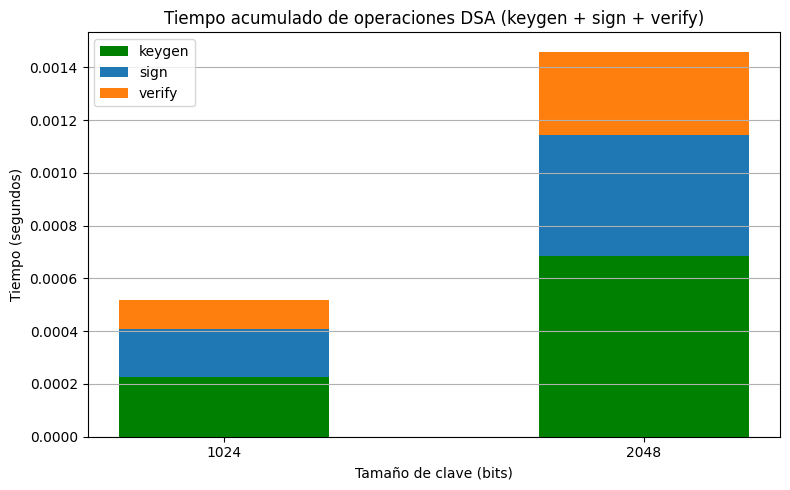

In [18]:
# Posiciones en el eje x
x = np.arange(len(df_dsa['Bits total']))
width = 0.5  # Ancho de las barras

plt.figure(figsize=(8, 5))

# Barras apiladas
plt.bar(x, df_dsa['keygen (s)'], width, label='keygen', color='green')
plt.bar(x, df_dsa['sign (s)'], width, bottom=df_dsa['keygen (s)'], label='sign')
plt.bar(x, df_dsa['verify (s)'], width, bottom=df_dsa['keygen (s)'] + df_dsa['sign (s)'], label='verify')

# Etiquetas y estilo
plt.xlabel('Tamaño de clave (bits)')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo acumulado de operaciones DSA (keygen + sign + verify)')
plt.xticks(x, df_dsa['Bits total'])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

---

## 2.2. Rivest Shamir Adleman

In [19]:
mask = df_firma["Familia"] == "RSA"
df_rsa = df_firma[mask]

# Ver los registros filtrados
df_rsa.head(9)


,Algoritmo,keygen (s),sign (s),verify (s),keygens/s,sign/s,verify/s,Familia,Bits total,Tiempo total (s)
58,rsa512,4.321000e-03,0.000051,0.000003,231.4,19596.2,317185.6,RSA,512,4.375000e-03
59,rsa1024,1.136100e-02,0.000111,0.000007,88.0,8990.8,135543.8,RSA,1024,1.147900e-02
60,rsa2048,6.083800e-02,0.000741,0.000022,16.4,1349.9,45399.5,RSA,2048,6.160100e-02
61,rsa3072,2.096080e-01,0.002243,0.000047,4.8,445.9,21431.5,RSA,3072,2.118980e-01
62,rsa4096,6.973330e-01,0.004915,0.000079,1.4,203.5,12737.3,RSA,4096,7.023270e-01
63,rsa7680,6.615000e+06,0.046147,0.000257,0.2,21.7,3887.9,RSA,7680,6.615000e+06
64,rsa15360,1.810400e+08,0.242326,0.001022,0.0,4.1,978.5,RSA,15360,1.810400e+08


**Algoritmo:** Rivest Shamir Adleman (RSA)
**Función:** firma digital y cifrado asimétrico.
**Descripción:** La tabla muestra el rendimiento del algoritmo RSA con diferentes tamaños de clave (de 512 a 15360 bits), en operaciones típicas de TLS. Muestra los tiempos base del algoritmo criptográfico RSA para firmar, verificar, cifrar y descifrar mensajes .

**Función:** firma digital


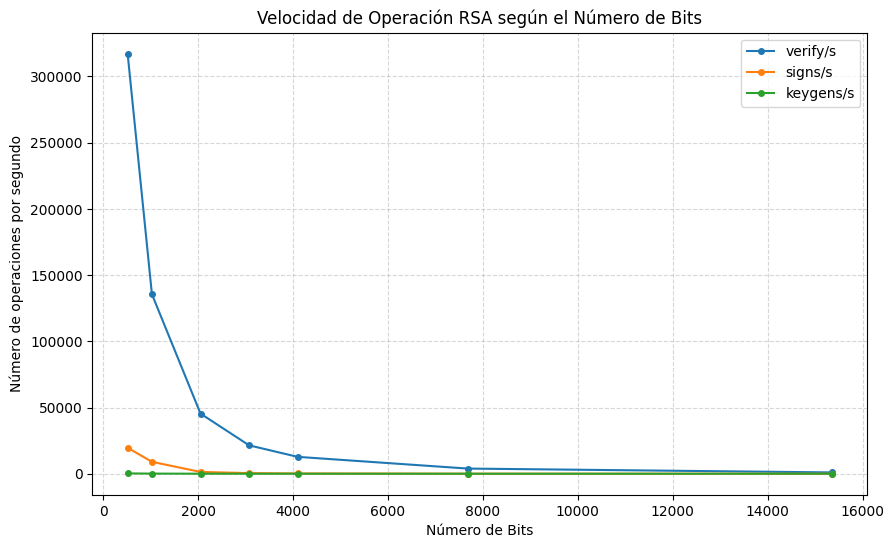

In [20]:

# datos estén en orden por Bits
df_rsa = df_rsa.sort_values(by="Bits total")

plt.figure(figsize=(10, 6))
plt.plot(df_rsa["Bits total"], df_rsa["verify/s"], marker="o", label="verify/s", linestyle="-",markersize = 4)
plt.plot(df_rsa["Bits total"], df_rsa["sign/s"], marker="o", label="signs/s", linestyle="-",markersize = 4)
plt.plot(df_rsa["Bits total"], df_rsa["keygens/s"], marker="o", label="keygens/s", linestyle="-",markersize = 4)


plt.xlabel("Número de Bits")
plt.ylabel("Número de operaciones por segundo")
plt.title("Velocidad de Operación RSA según el Número de Bits")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

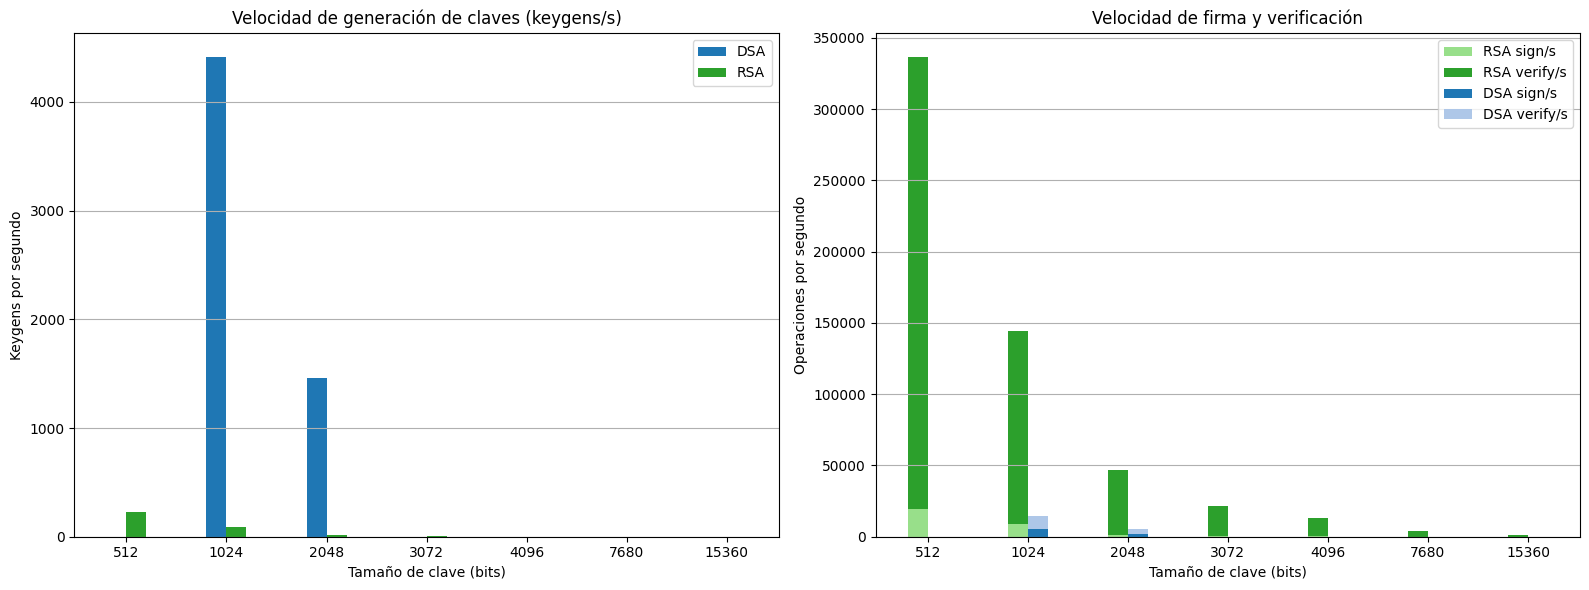

In [21]:
# Unificar los bits para alinear DSA y RSA
bits_comunes = sorted(set(df_dsa['Bits total']).union(df_rsa['Bits total']))
x = np.arange(len(bits_comunes))
width = 0.2

# Mapear valores de DSA y RSA a todos los bits
def map_values(df, column):
    return [df[df['Bits total'] == b][column].values[0] if b in df['Bits total'].values else 0 for b in bits_comunes]

# Extraer valores mapeados
dsa_keygen = map_values(df_dsa, 'keygens/s')
rsa_keygen = map_values(df_rsa, 'keygens/s')
dsa_sign = map_values(df_dsa, 'sign/s')
rsa_sign = map_values(df_rsa, 'sign/s')
dsa_verify = map_values(df_dsa, 'verify/s')
rsa_verify = map_values(df_rsa, 'verify/s')

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --------- Gráfico 1: keygens/s ----------
axes[0].bar(x - width/2, dsa_keygen, width=width, label='DSA', color='#1f77b4')   # Verde oscuro
axes[0].bar(x + width/2, rsa_keygen, width=width, label='RSA', color='#2ca02c')   # Azul oscuro
axes[0].set_xticks(x)
axes[0].set_xticklabels(bits_comunes)
axes[0].set_xlabel('Tamaño de clave (bits)')
axes[0].set_ylabel('Keygens por segundo')
axes[0].set_title('Velocidad de generación de claves (keygens/s)')
axes[0].legend()
axes[0].grid(axis='y')

# --------- Gráfico 2: signs/s y verify/s (apilados) ----------
# RSA
axes[1].bar(x - width/2, rsa_sign, width=width, label='RSA sign/s',  color='#98df8a')
axes[1].bar(x - width/2, rsa_verify, width=width, bottom=rsa_sign, label='RSA verify/s',color='#2ca02c')

# DSA
axes[1].bar(x + width/2, dsa_sign, width=width, label='DSA sign/s',color='#1f77b4')
axes[1].bar(x + width/2, dsa_verify, width=width, bottom=dsa_sign, label='DSA verify/s', color='#aec7e8' )
axes[1].set_xticks(x)
axes[1].set_xticklabels(bits_comunes)
axes[1].set_xlabel('Tamaño de clave (bits)')
axes[1].set_ylabel('Operaciones por segundo')
axes[1].set_title('Velocidad de firma y verificación')
axes[1].legend()
axes[1].grid(axis='y')
plt.tight_layout()
plt.show()

---

## 2.3. Elliptic Curve Digital Signature Algorithm
**Algoritmo**: Elliptic Curve Digital Signature Algorithm (ECDSA)

**Función**: Firma digital

**Descripción**:
La tabla muestra el rendimiento del algoritmo ECDSA usando distintas curvas elípticas estandarizadas, como las definidas por NIST, Brainpool, SECP y Koblitz. Cada curva opera sobre un campo (primo o binario) y tiene un tamaño de clave (por ejemplo, 256 o 521 bits), que influye en la seguridad y eficiencia.
Aunque el tamaño de clave de una curva ECDSA puede ser de 256 bits, la seguridad real es aproximadamente la mitad debido a la complejidad del ataque más eficiente conocido: el logaritmo discreto en curvas elípticas (ECDLP).


**Curvas utilizadas**

* Prefijo:

nist: Curvas recomendadas por el NIST (EE.UU.)

brainpool: Curvas promovidas por el grupo alemán Brainpool

secp: Curvas definidas por Standards for Efficient Cryptography

nistk: Curvas Koblitz, optimizadas para eficiencia

* Tipo de curva:

p: Curvas sobre campos primos (uso más común)

k: Curvas Koblitz sobre campos binarios

b: Curvas binarias no-Koblitz

* Propiedades de la curva:

r1 – Random (aleatoria):
Curvas generadas aleatoriamente siguiendo criterios criptográficos estrictos. Están pensadas para uso general y cumplen con principios de seguridad como la aleatoriedad verificable.

t1 – Twisted (torcida):
Curvas twisted (torcidas), es decir, formas alternativas matemáticamente equivalentes a las curvas r1. Utilizadas principalmente para estudios académicos o experimentación, no recomendadas para uso práctico salvo casos específicos.

Tienen las mismas propiedades criptográficas (tamaño, seguridad), pero distinta representación.

* Tamaño de clave (bits)

 Define el tamaño del campo sobre el que se define la curva, afectando directamente el nivel de seguridad y rendimiento. Ejemplo: una curva de 256 bits proporciona aproximadamente 128 bits de seguridad efectiva.



In [22]:
df_ecdsa = dfs["ecdsa"]

In [23]:
df_ecdsa.columns
df_ecdsa.columns = df_ecdsa.columns.str.strip()

In [24]:
# PROCESAR ECDSA
# ---------------
# Nombre del algoritmo fijo
df_ecdsa['Familia'] = 'ECDSA'

# Extraer bits (número)
df_ecdsa['Bits total'] = df_ecdsa['Algoritmo'].str.extract(r'(\d+)').astype(int)
# Crear columna con bits por intervalos
bins = [159, 192, 283, 384, 448, 571]  # Límites de los grupos
labels = ['160–192', '224–283', '384', '409–448', '512–571']  # Etiquetas
df_ecdsa['Grupo bits'] = pd.cut(df_ecdsa['Bits total'], bins=bins, labels=labels)


# Extraer curva (texto dentro de paréntesis)
df_ecdsa['Algoritmo'] = df_ecdsa['Algoritmo'].str.extract(r'\(([^)]+)\)')
# Eliminar curvas que terminan en 't1' y hacer copia para evitar warning
df_ecdsa = df_ecdsa[~df_ecdsa['Algoritmo'].str.endswith('t1', na=False)].copy()

# Extraer tipo según las familias indicadas
patron = r'(nistk|nistb|nistp|brainpool|X448|X25519|secp)'
df_ecdsa['Curva'] = df_ecdsa['Algoritmo'].str.extract(patron)

# Para X25519 y X448 dejar tipo igual a curva para diferenciarlas, si existieran aquí
df_ecdsa['Curva'] = np.where(df_ecdsa['Algoritmo'].isin(['X25519', 'X448']), df_ecdsa['Algoritmo'], df_ecdsa['Curva'])


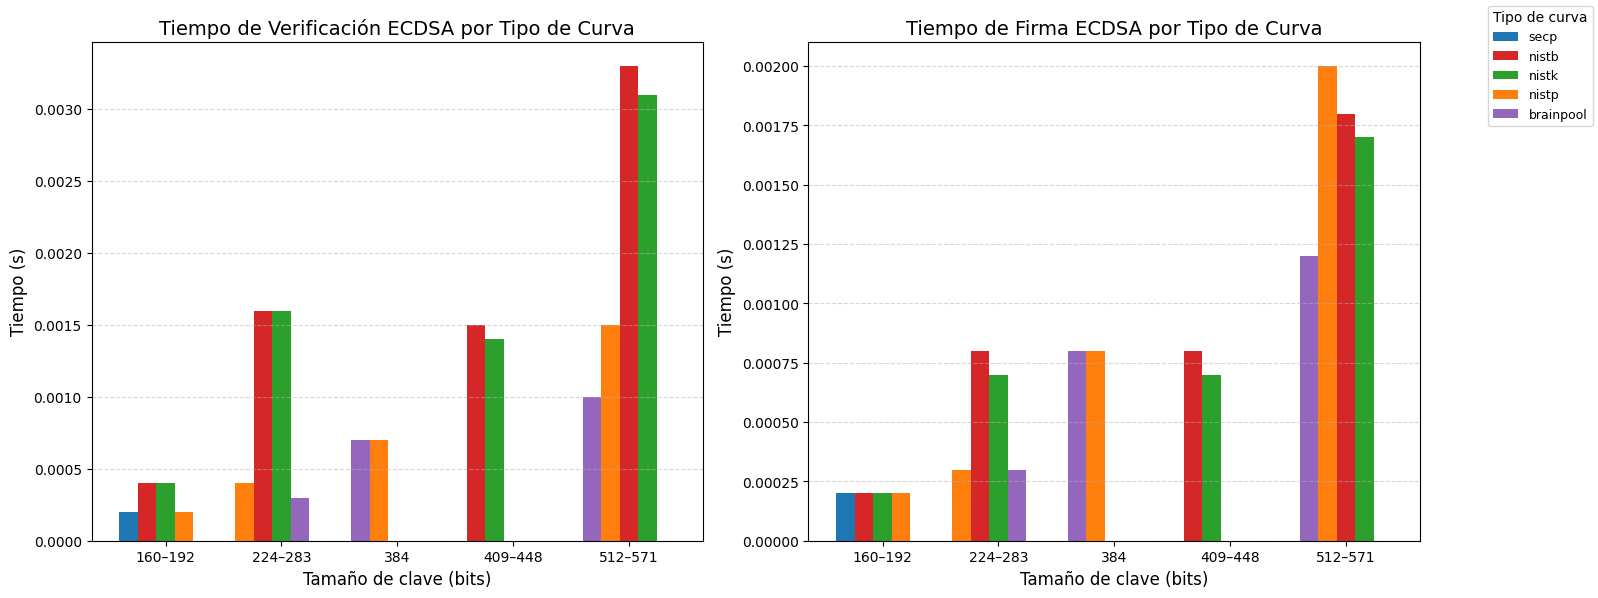

In [25]:
# ---- CONFIGURACIÓN INICIAL ----
tipos = df_ecdsa["Curva"].unique()
grupos_bits = sorted(df_ecdsa["Grupo bits"].unique())
bar_width = 0.8 / len(tipos)

# ---- RESUMIR DATOS ----
df_sum_verify = (
    df_ecdsa.groupby(["Grupo bits", "Curva"], observed=False)
           .agg({"verify (s)": "sum", "Bits total": "first"})
           .reset_index()
)

df_sum_sign = (
    df_ecdsa.groupby(["Grupo bits", "Curva"], observed=False)
           .agg({"sign (s)": "sum", "Bits total": "first"})
           .reset_index()
)

# ---- CONFIGURACIÓN DE LA GRÁFICA ----
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ---- FUNCIÓN PARA DIBUJAR ----
def plot_metric(axis, df_sum, metrica, titulo):
    for i, g in enumerate(grupos_bits):
        datos_grupo = df_sum[df_sum["Grupo bits"] == g].sort_values(by="Bits total")
        tipos_ordenados = datos_grupo["Curva"].values
        tiempos_ordenados = datos_grupo[metrica].values

        for j, (t, op) in enumerate(zip(tipos_ordenados, tiempos_ordenados)):
            axis.bar(
                i + j * bar_width - (len(tipos_ordenados) - 1) * bar_width / 2,
                op,
                width=bar_width,
                label=t if i == 0 else "",
                color=plt.cm.tab10(np.where(tipos == t)[0][0]),
            )
    axis.set_xticks(np.arange(len(grupos_bits)))
    axis.set_xticklabels(grupos_bits, fontsize=10)
    axis.set_xlabel("Tamaño de clave (bits)", fontsize=12)
    axis.set_ylabel("Tiempo (s)", fontsize=12)
    axis.set_title(titulo, fontsize=14)
    axis.grid(axis='y', linestyle='--', alpha=0.5)

# ---- DIBUJAR VERIFY y SIGN EN CADA EJE ----
plot_metric(axes[0], df_sum_verify, "verify (s)", "Tiempo de Verificación ECDSA por Tipo de Curva")
plot_metric(axes[1], df_sum_sign, "sign (s)", "Tiempo de Firma ECDSA por Tipo de Curva")

# ---- LEYENDA ÚNICA ----
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Tipo de curva", title_fontsize=10, fontsize=9, loc="upper right")

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


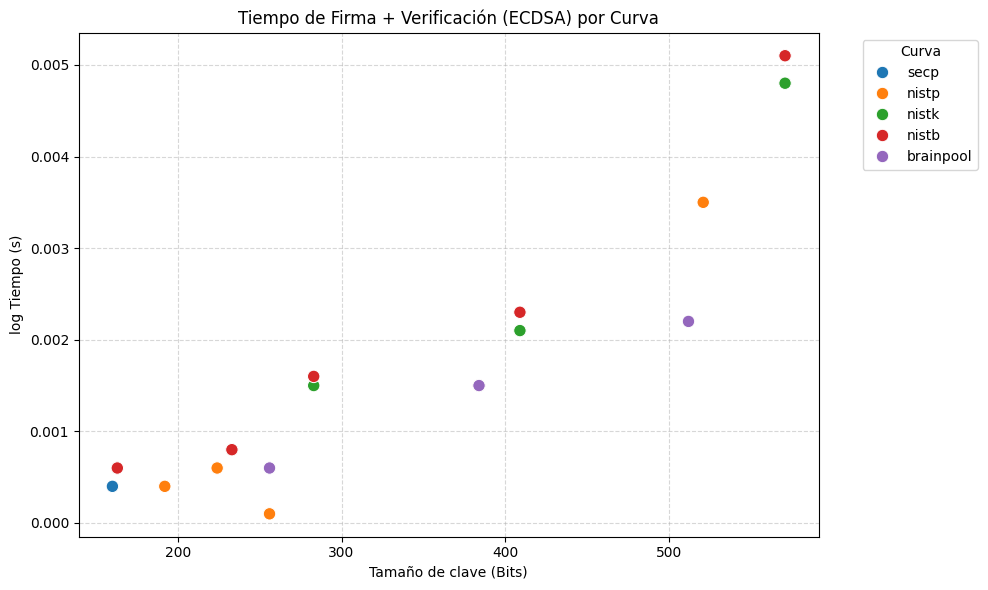

In [26]:
# Calcular columna con la suma de sign + verify
df_ecdsa['Tiempo total (s)'] = df_ecdsa['sign (s)'] + df_ecdsa['verify (s)']

# Crear scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_ecdsa,
    x='Bits total',
    y='Tiempo total (s)',
    hue='Curva',
    s=80
)

# Etiquetas y detalles
plt.ylabel('log Tiempo (s)')

plt.xlabel('Tamaño de clave (Bits)')
plt.title('Tiempo de Firma + Verificación (ECDSA) por Curva')
plt.grid(True, linestyle='--', alpha=0.5)

# Leyenda fuera del gráfico
plt.legend(title='Curva', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


---

## 2.4. Edwards-curve DSA

In [27]:
df_edDSA = dfs["edDSA"]

**Algoritmo**: Edwards-curve Digital Signature Algorithm (EdDSA)

**Función**: Firma digital

**Descripción**:
Esta tabla presenta el rendimiento de dos variantes del algoritmo EdDSA, una alternativa moderna a ECDSA, basada en curvas de tipo Edwards. Se usa ampliamente en aplicaciones modernas de seguridad como OpenSSH, TLS, DNSSEC, y sistemas de identidad digital.

Las versiones evaluadas son:

* Ed25519: Basada en la curva Curve25519 con un tamaño de 253 bits. Ofrece alta eficiencia y seguridad de aproximadamente 128 bits. Es actualmente uno de los algoritmos de firma digital más utilizados por su rendimiento y resistencia a ataques de canal lateral.

* Ed448: Basada en la curva Curve448, con un tamaño de 456 bits, proporciona mayor seguridad (~224 bits) pero a costa de mayor tiempo de procesamiento.

**Métricas**

* Sign Time (s): Tiempo promedio para generar una firma digital.

* Verify Time (s): Tiempo promedio para verificar una firma.

* Sign/s: Número de firmas que pueden realizarse por segundo.

* Verify/s: Número de verificaciones que pueden realizarse por segundo.

In [28]:
df_edDSA.head(2)

,Algoritmo,sign (s),verify (s),sign/s,verify/s
0,253 bits EdDSA (Ed25519),0.0000,0.0001,24889.5,8974.2
1,456 bits EdDSA (Ed448),0.0002,0.0002,4899.6,4790.4


In [29]:
# PROCESAR EDDSA
# ---------------

# Nombre algoritmo fijo
df_edDSA['Familia'] = 'ECDSA'

# Extraer bits
df_edDSA['Bits total'] = df_edDSA['Algoritmo'].str.extract(r'(\d+)').astype(int)

# Extraer curva (texto dentro de paréntesis)
df_edDSA['Algoritmo'] = df_edDSA['Algoritmo'].str.extract(r'\(([^)]+)\)')


df_edDSA['Curva'] = df_edDSA['Algoritmo']

df_edDSA.head(3)

,Algoritmo,sign (s),verify (s),sign/s,verify/s,Familia,Bits total,Curva
0,Ed25519,0.0000,0.0001,24889.5,8974.2,ECDSA,253,Ed25519
1,Ed448,0.0002,0.0002,4899.6,4790.4,ECDSA,456,Ed448


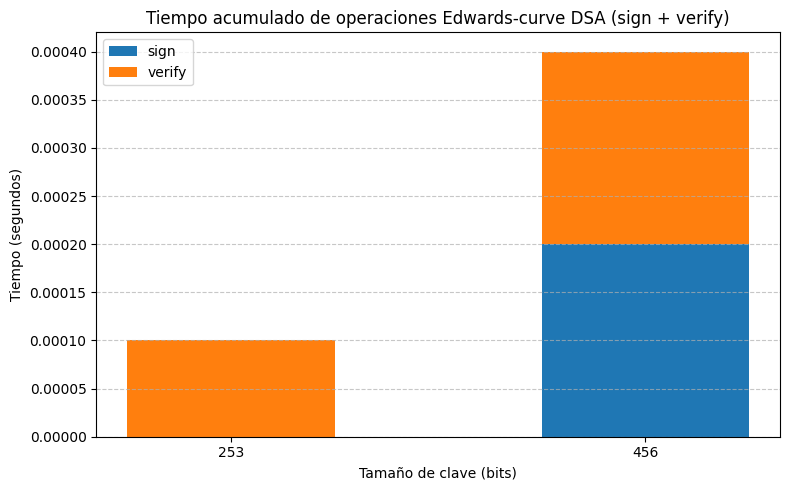

In [30]:
# Posiciones en el eje x
x = np.arange(len(df_edDSA['Bits total']))
width = 0.5  # Ancho de las barras

plt.figure(figsize=(8, 5))

# Barras apiladas correctamente
plt.bar(x, df_edDSA['sign (s)'], width, label='sign')
plt.bar(x, df_edDSA['verify (s)'], width, bottom=df_edDSA['sign (s)'], label='verify')

# Etiquetas y estilo
plt.xlabel('Tamaño de clave (bits)')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo acumulado de operaciones Edwards-curve DSA (sign + verify)')
plt.xticks(x, df_edDSA['Bits total'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---

In [31]:
df_sm2 = dfs['sm2']

## 2.5. Criptografía Comercial Shāng Mì

**Algoritmo**: SM2 (Signature Algorithm Based on ECC)

**Función**: Firma digital (también se puede usar para cifrado)

**Descripción**:
SM2 es un algoritmo de firma digital basado en criptografía de curva elíptica, definido por el estándar chino GBT.32918. Utiliza una curva de 256 bits llamada CurveSM2 y está diseñado para cumplir con regulaciones criptográficas chinas. Se emplea ampliamente en entornos donde se requiere conformidad con los estándares del gobierno chino, como servicios gubernamentales, financieros y de telecomunicaciones.

Aunque similar en estructura a ECDSA, SM2 incorpora características propias como el uso de identificadores de usuario (ID) dentro del proceso de firma para proteger contra ataques de suplantación.

**Métricas**

* Sign Time (s): Tiempo promedio para generar una firma digital.

* Verify Time (s): Tiempo promedio para verificar una firma.

* Sign/s: Número de firmas que pueden realizarse por segundo.

* Verify/s: Número de verificaciones que pueden realizarse por segundo.

In [32]:
# PROCESAR SM2
# ------------
# Nombre algoritmo fijo
df_sm2['Familia'] = 'ECDSA'

# Extraer bits
df_sm2['Bits total'] = df_sm2['Algoritmo'].str.extract(r'(\d+)').astype(int)

# Extraer curva dentro de paréntesis
df_sm2['Algoritmo'] = df_sm2['Algoritmo'].str.extract(r'\(([^)]+)\)')
# Extraer curva dentro de paréntesis
df_sm2['Curva'] = df_sm2['Algoritmo']

In [33]:
df_sm2.head(2)

,Algoritmo,sign (s),verify (s),sign/s,verify/s,Familia,Bits total,Curva
0,CurveSM2,0.0003,0.0003,2944.4,3314.3,ECDSA,256,CurveSM2


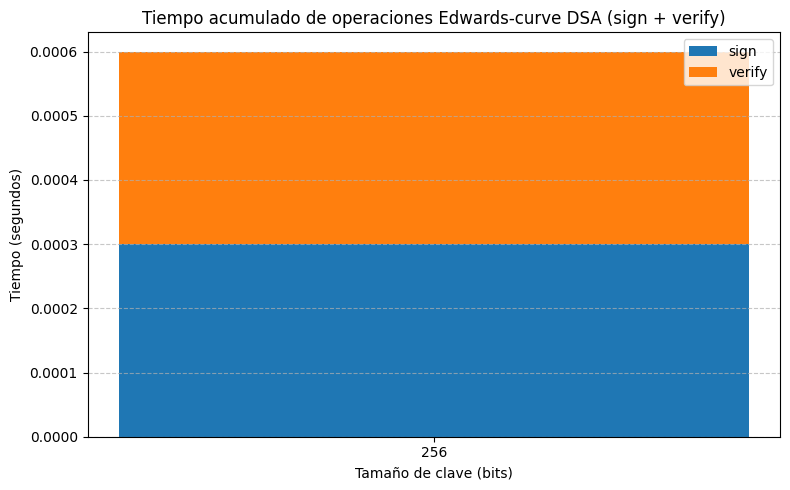

In [34]:
# Posiciones en el eje x
x = np.arange(len(df_sm2['Bits total']))
width = 0.5  # Ancho de las barras

plt.figure(figsize=(8, 5))

# Barras apiladas correctamente
plt.bar(x, df_sm2['sign (s)'], width, label='sign')
plt.bar(x, df_sm2['verify (s)'], width, bottom=df_sm2['sign (s)'], label='verify')

# Etiquetas y estilo
plt.xlabel('Tamaño de clave (bits)')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo acumulado de operaciones Edwards-curve DSA (sign + verify)')
plt.xticks(x, df_sm2['Bits total'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 2.6. Comparativa.

In [35]:
df_firma_clasica = pd.concat([df_rsa, df_dsa,df_ecdsa, df_edDSA, df_sm2], ignore_index=True)
orden_columnas = [
    "Familia",
    "Bits total",
    "keygen (s)",
    "sign (s)",
    "verify (s)",
    "keygens/s",
    "sign/s",
    "verify/s",
    "Tiempo total (s)",
    "Curva",
    "Grupo bits",
     "Algoritmo"
]

# Reordenamos el DataFrame
df_firma_clasica = df_firma_clasica[orden_columnas]


In [36]:
df_firma_clasica = df_firma_clasica.sort_values(
    by=['Familia', 'Curva', 'Bits total'],
    ascending=[True, True, True],
    na_position='last'  # Opcional: asegura que los NaN de 'Tipo' queden al final
).reset_index(drop=True)


In [37]:
df_firma_clasica.head(100)

,Familia,Bits total,keygen (s),sign (s),verify (s),keygens/s,sign/s,verify/s,Tiempo total (s),Curva,Grupo bits,Algoritmo
0,DSA,1024,2.260000e-04,0.000184,0.000107,4415.4,5435.3,9342.3,5.170000e-04,NaN,NaN,dsa1024
1,DSA,2048,6.860000e-04,0.000458,0.000316,1458.0,2183.3,3167.8,1.460000e-03,NaN,NaN,dsa2048
2,ECDSA,256,NaN,0.000300,0.000300,NaN,2944.4,3314.3,NaN,CurveSM2,NaN,CurveSM2
3,ECDSA,253,NaN,0.000000,0.000100,NaN,24889.5,8974.2,NaN,Ed25519,NaN,Ed25519
4,ECDSA,456,NaN,0.000200,0.000200,NaN,4899.6,4790.4,NaN,Ed448,NaN,Ed448
5,ECDSA,256,NaN,0.000300,0.000300,NaN,3004.6,2990.5,6.000000e-04,brainpool,224–283,brainpoolP256r1
6,ECDSA,384,NaN,0.000800,0.000700,NaN,1203.1,1403.2,1.500000e-03,brainpool,384,brainpoolP384r1
7,ECDSA,512,NaN,0.001200,0.001000,NaN,850.2,1000.1,2.200000e-03,brainpool,512–571,brainpoolP512r1
8,ECDSA,163,NaN,0.000200,0.000400,NaN,5114.2,2247.7,6.000000e-04,nistb,160–192,nistb163
9,ECDSA,233,NaN,0.000300,0.000500,NaN,3411.6,1867.3,8.000000e-04,nistb,224–283,nistb233


In [38]:


# 2. Eliminar columna 'keygen (s)'
# df_firma_clasica = df_firma_clasica.drop(columns=['keygen (s)'])

# 3. Calcular 'Tiempo total (s)' como suma de 'sign (s)' y 'verify (s)'
df_firma_clasica['Tiempo total (s)'] = df_firma_clasica['sign (s)'] + df_firma_clasica['verify (s)']

# 4. Calcular 'Grupo bits' a partir de 'Bits total'

# Asegurar que 'Grupo bits' no sea Categorical para permitir nuevos valores
df_firma_clasica['Grupo bits'] = df_firma_clasica['Grupo bits'].astype('object')

# Rellenar valores nulos con los correspondientes de 'Bits total'
df_firma_clasica['Grupo bits'] = df_firma_clasica['Grupo bits'].fillna(df_firma_clasica['Bits total'])


# 5. Exportar a Excel
df_firma_clasica.to_excel("firmas_clasicas_procesadas.xlsx", index=False)

In [39]:
df_firma_clasica.head(100)

,Familia,Bits total,keygen (s),sign (s),verify (s),keygens/s,sign/s,verify/s,Tiempo total (s),Curva,Grupo bits,Algoritmo
0,DSA,1024,2.260000e-04,0.000184,0.000107,4415.4,5435.3,9342.3,0.000291,NaN,1024,dsa1024
1,DSA,2048,6.860000e-04,0.000458,0.000316,1458.0,2183.3,3167.8,0.000774,NaN,2048,dsa2048
2,ECDSA,256,NaN,0.000300,0.000300,NaN,2944.4,3314.3,0.000600,CurveSM2,256,CurveSM2
3,ECDSA,253,NaN,0.000000,0.000100,NaN,24889.5,8974.2,0.000100,Ed25519,253,Ed25519
4,ECDSA,456,NaN,0.000200,0.000200,NaN,4899.6,4790.4,0.000400,Ed448,456,Ed448
5,ECDSA,256,NaN,0.000300,0.000300,NaN,3004.6,2990.5,0.000600,brainpool,224–283,brainpoolP256r1
6,ECDSA,384,NaN,0.000800,0.000700,NaN,1203.1,1403.2,0.001500,brainpool,384,brainpoolP384r1
7,ECDSA,512,NaN,0.001200,0.001000,NaN,850.2,1000.1,0.002200,brainpool,512–571,brainpoolP512r1
8,ECDSA,163,NaN,0.000200,0.000400,NaN,5114.2,2247.7,0.000600,nistb,160–192,nistb163
9,ECDSA,233,NaN,0.000300,0.000500,NaN,3411.6,1867.3,0.000800,nistb,224–283,nistb233


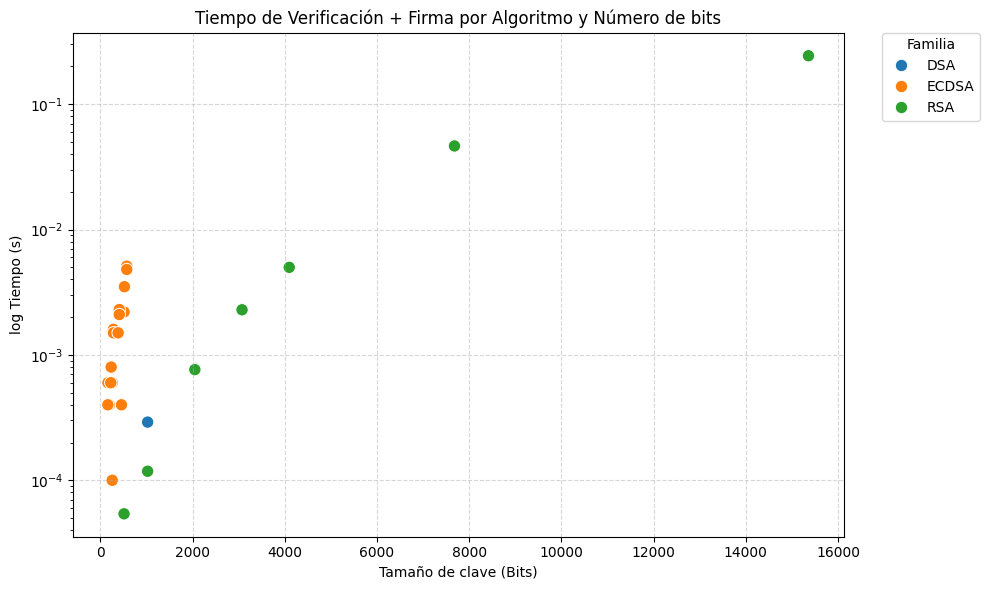

In [40]:

# Crear columna de tiempo total
df_firma_clasica['Tiempo total (s)'] = df_firma_clasica['verify (s)'] + df_firma_clasica['sign (s)']


# Crear gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_firma_clasica, x='Bits total', y='Tiempo total (s)', hue='Familia', s=80)

# Etiquetas y detalles
plt.ylabel('log Tiempo (s)')
plt.yscale('log')
plt.xlabel('Tamaño de clave (Bits)')
plt.title('Tiempo de Verificación + Firma por Algoritmo y Número de bits')
plt.grid(True, linestyle='--', alpha=0.5)

# Leyenda fuera de la gráfica (a la derecha)
plt.legend(title='Familia', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Ajustar layout para evitar recortes
plt.tight_layout()
plt.show()


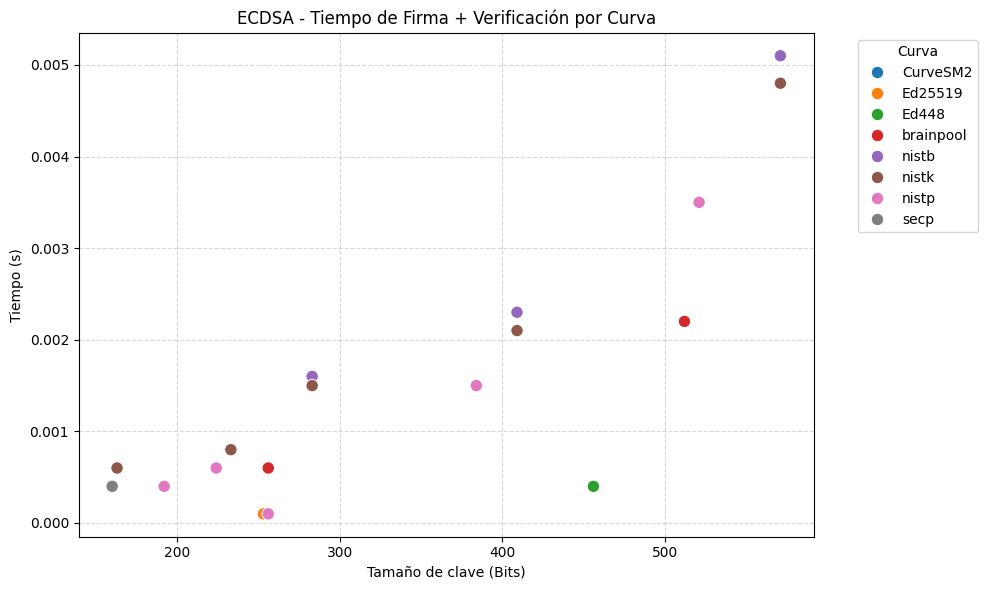

In [41]:
# Filtrar solo filas de familia ECDSA
df_ecdsa = df_firma_clasica[df_firma_clasica['Familia'] == 'ECDSA'].copy()

# Calcular tiempo total (firma + verificación)
df_ecdsa['Tiempo total (s)'] = df_ecdsa['sign (s)'] + df_ecdsa['verify (s)']

# Crear scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_ecdsa,
    x='Bits total',
    y='Tiempo total (s)',
    hue='Curva',   # Color por curva
    s=80
)

# Estética del gráfico

plt.xlabel('Tamaño de clave (Bits)')
plt.ylabel('Tiempo (s)')
plt.title('ECDSA - Tiempo de Firma + Verificación por Curva')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Curva', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


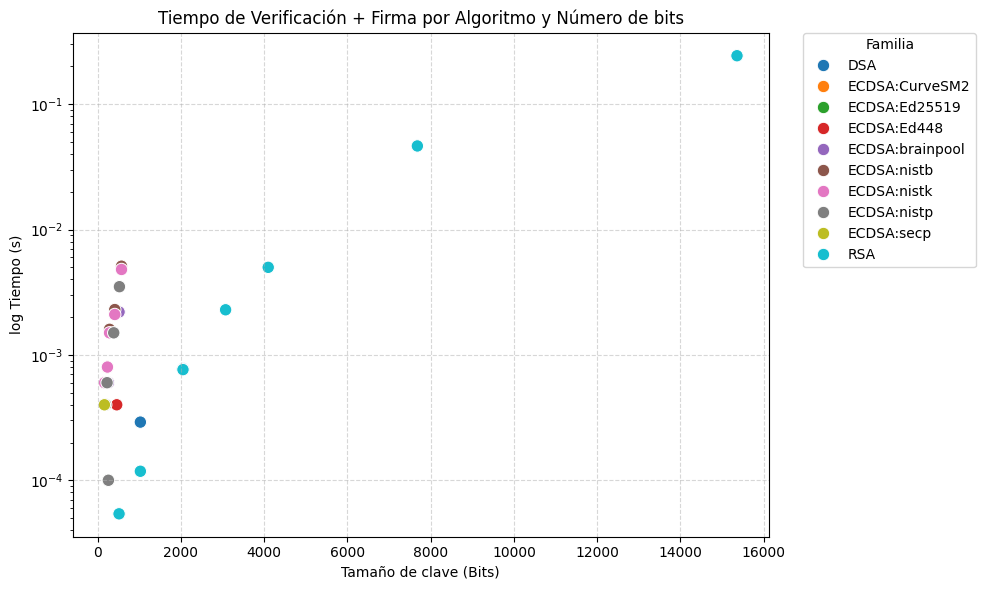

In [42]:
# Crear columna para categoría de la leyenda
df_firma_clasica['Familia'] = df_firma_clasica.apply(
    lambda x: f"ECDSA:{x['Curva']}" if pd.notnull(x.get('Curva', None)) and str(x.get('Curva','')).strip() != ''
    else x['Familia'],
    axis=1
)

# Crear columna de tiempo total
df_firma_clasica['Tiempo total (s)'] = df_firma_clasica['verify (s)'] + df_firma_clasica['sign (s)']

# Crear gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_firma_clasica, x='Bits total', y='Tiempo total (s)', hue='Familia', s=80)

# Etiquetas y detalles
plt.ylabel('log Tiempo (s)')
plt.yscale('log')
plt.xlabel('Tamaño de clave (Bits)')
plt.title('Tiempo de Verificación + Firma por Algoritmo y Número de bits')
plt.grid(True, linestyle='--', alpha=0.5)

# Leyenda fuera de la gráfica (a la derecha)
plt.legend(title='Familia', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Ajustar layout para evitar recortes
plt.tight_layout()
plt.show()


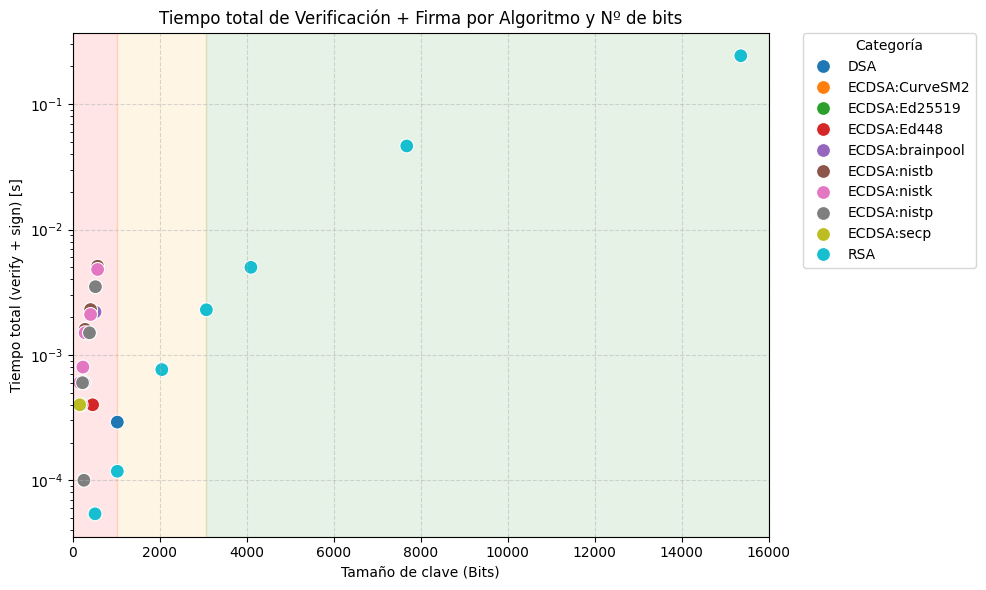

In [43]:
# Crear columna para categoría de la leyenda
df_firma_clasica['Categoria'] = df_firma_clasica.apply(
    lambda x: f"ECCDSA:{x['Tipo']}" if pd.notnull(x.get('Tipo', None)) and str(x.get('Tipo','')).strip() != ''
    else x['Familia'],
    axis=1
)

# Crear columna de tiempo total
df_firma_clasica['Tiempo total (s)'] = df_firma_clasica['verify (s)'] + df_firma_clasica['sign (s)']

plt.figure(figsize=(10, 6))

# Bandas de color
plt.axvspan(0, 1024, color='red', alpha=0.1)
plt.axvspan(1025, 3072, color='orange', alpha=0.1)
plt.axvspan(3073, 16000, color='green', alpha=0.1)

# Dispersión de datos con colormap por categoría (Familia + Tipo)
sns.scatterplot(data=df_firma_clasica, x='Bits total', y='Tiempo total (s)',
                hue='Categoria', s=100)

# Etiquetas y detalles
plt.ylabel('Tiempo total (verify + sign) [s]')
plt.yscale('log')
plt.xlabel('Tamaño de clave (Bits)')
plt.title('Tiempo total de Verificación + Firma por Algoritmo y Nº de bits')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 16000)  # Limite de eje X

# Leyenda a la derecha
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()


## 3. Comparativa con algoritmos post cuánticos de firma digital

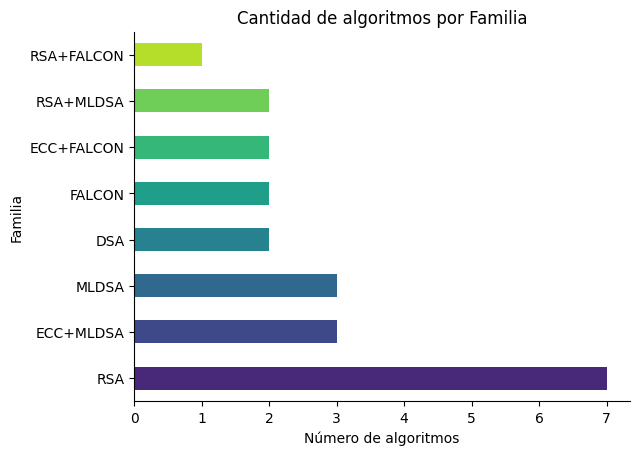

In [44]:
count_by_family = df_firma.groupby('Familia').size().sort_values(ascending=False)

# Generamos la paleta estándar
colors = sns.color_palette('viridis', n_colors=len(count_by_family))

count_by_family.plot(kind='barh', color=colors)
plt.gca().spines[['top','right']].set_visible(False)
plt.title('Cantidad de algoritmos por Familia', fontsize=12)
plt.xlabel('Número de algoritmos')
plt.show()

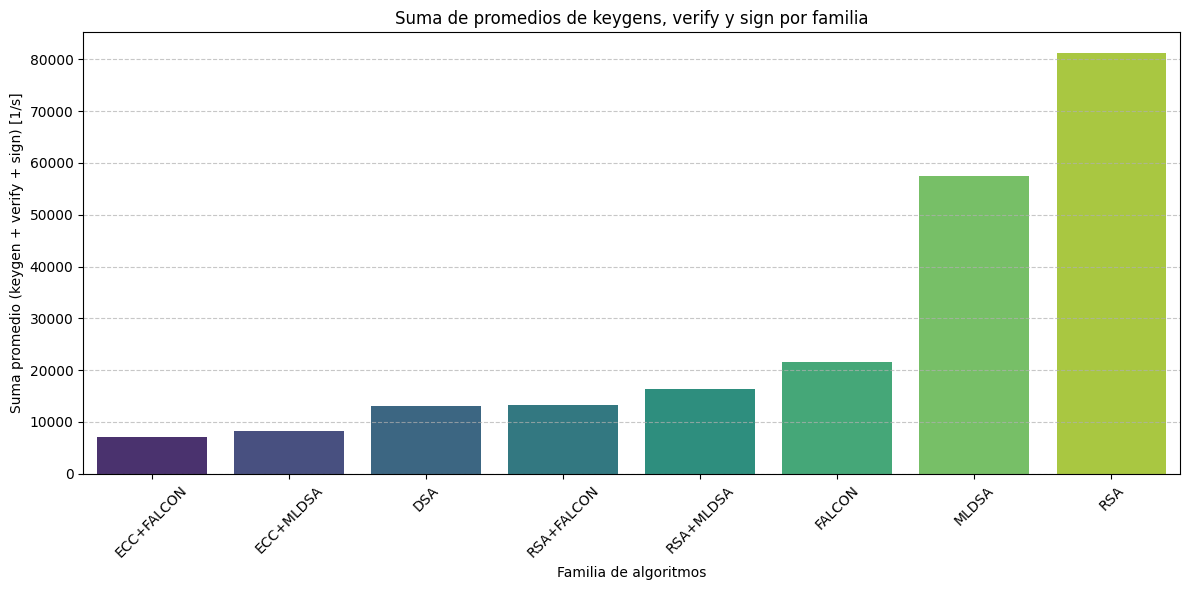

In [45]:
verify_avg = df_firma.groupby('Familia')['verify/s'].mean().sort_values()
keygen_avg = df_firma.groupby('Familia')['keygens/s'].mean().sort_values()
sign_avg = df_firma.groupby('Familia')['sign/s'].mean().sort_values()

familias = sorted(set(keygen_avg.index) | set(verify_avg.index) | set(sign_avg.index))

data = []
for fam in familias:
    suma = keygen_avg.get(fam, 0) + verify_avg.get(fam, 0) + sign_avg.get(fam, 0)
    data.append({'Familia': fam, 'Suma promedio (keygen+verify+sign)/s': suma})

df_suma = pd.DataFrame(data).sort_values('Suma promedio (keygen+verify+sign)/s')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_suma, x='Familia', y='Suma promedio (keygen+verify+sign)/s',
            hue='Familia', palette='viridis', legend=False)

plt.ylabel('Suma promedio (keygen + verify + sign) [1/s]')
plt.xlabel('Familia de algoritmos')
plt.title('Suma de promedios de keygens, verify y sign por familia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


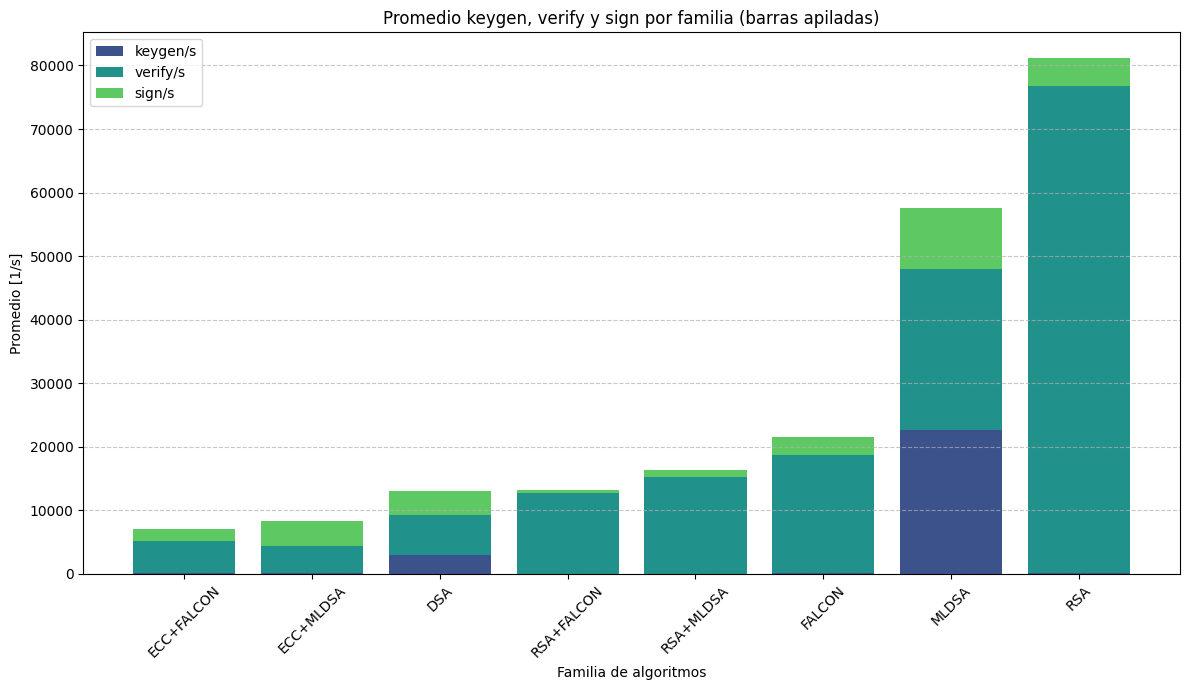

In [46]:
# Promedios ya calculados
verify_avg = df_firma.groupby('Familia')['verify/s'].mean()
keygen_avg = df_firma.groupby('Familia')['keygens/s'].mean()
sign_avg = df_firma.groupby('Familia')['sign/s'].mean()

# Crear DataFrame
df_stacked = pd.DataFrame({
    'keygen/s': keygen_avg,
    'verify/s': verify_avg,
    'sign/s': sign_avg
}).fillna(0)

df_stacked['total'] = df_stacked.sum(axis=1)
df_stacked = df_stacked.sort_values('total')

familias = df_stacked.index
keygen = df_stacked['keygen/s'].values
verify = df_stacked['verify/s'].values
sign = df_stacked['sign/s'].values

x = np.arange(len(familias))

# Obtener 3 colores de la paleta viridis
palette = sns.color_palette('viridis', 3)

plt.figure(figsize=(12, 7))

plt.bar(x, keygen, label='keygen/s', color=palette[0])
plt.bar(x, verify, bottom=keygen, label='verify/s', color=palette[1])
plt.bar(x, sign, bottom=keygen+verify, label='sign/s', color=palette[2])

plt.xticks(x, familias, rotation=45)
plt.ylabel('Promedio [1/s]')
plt.xlabel('Familia de algoritmos')
plt.title('Promedio keygen, verify y sign por familia (barras apiladas)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

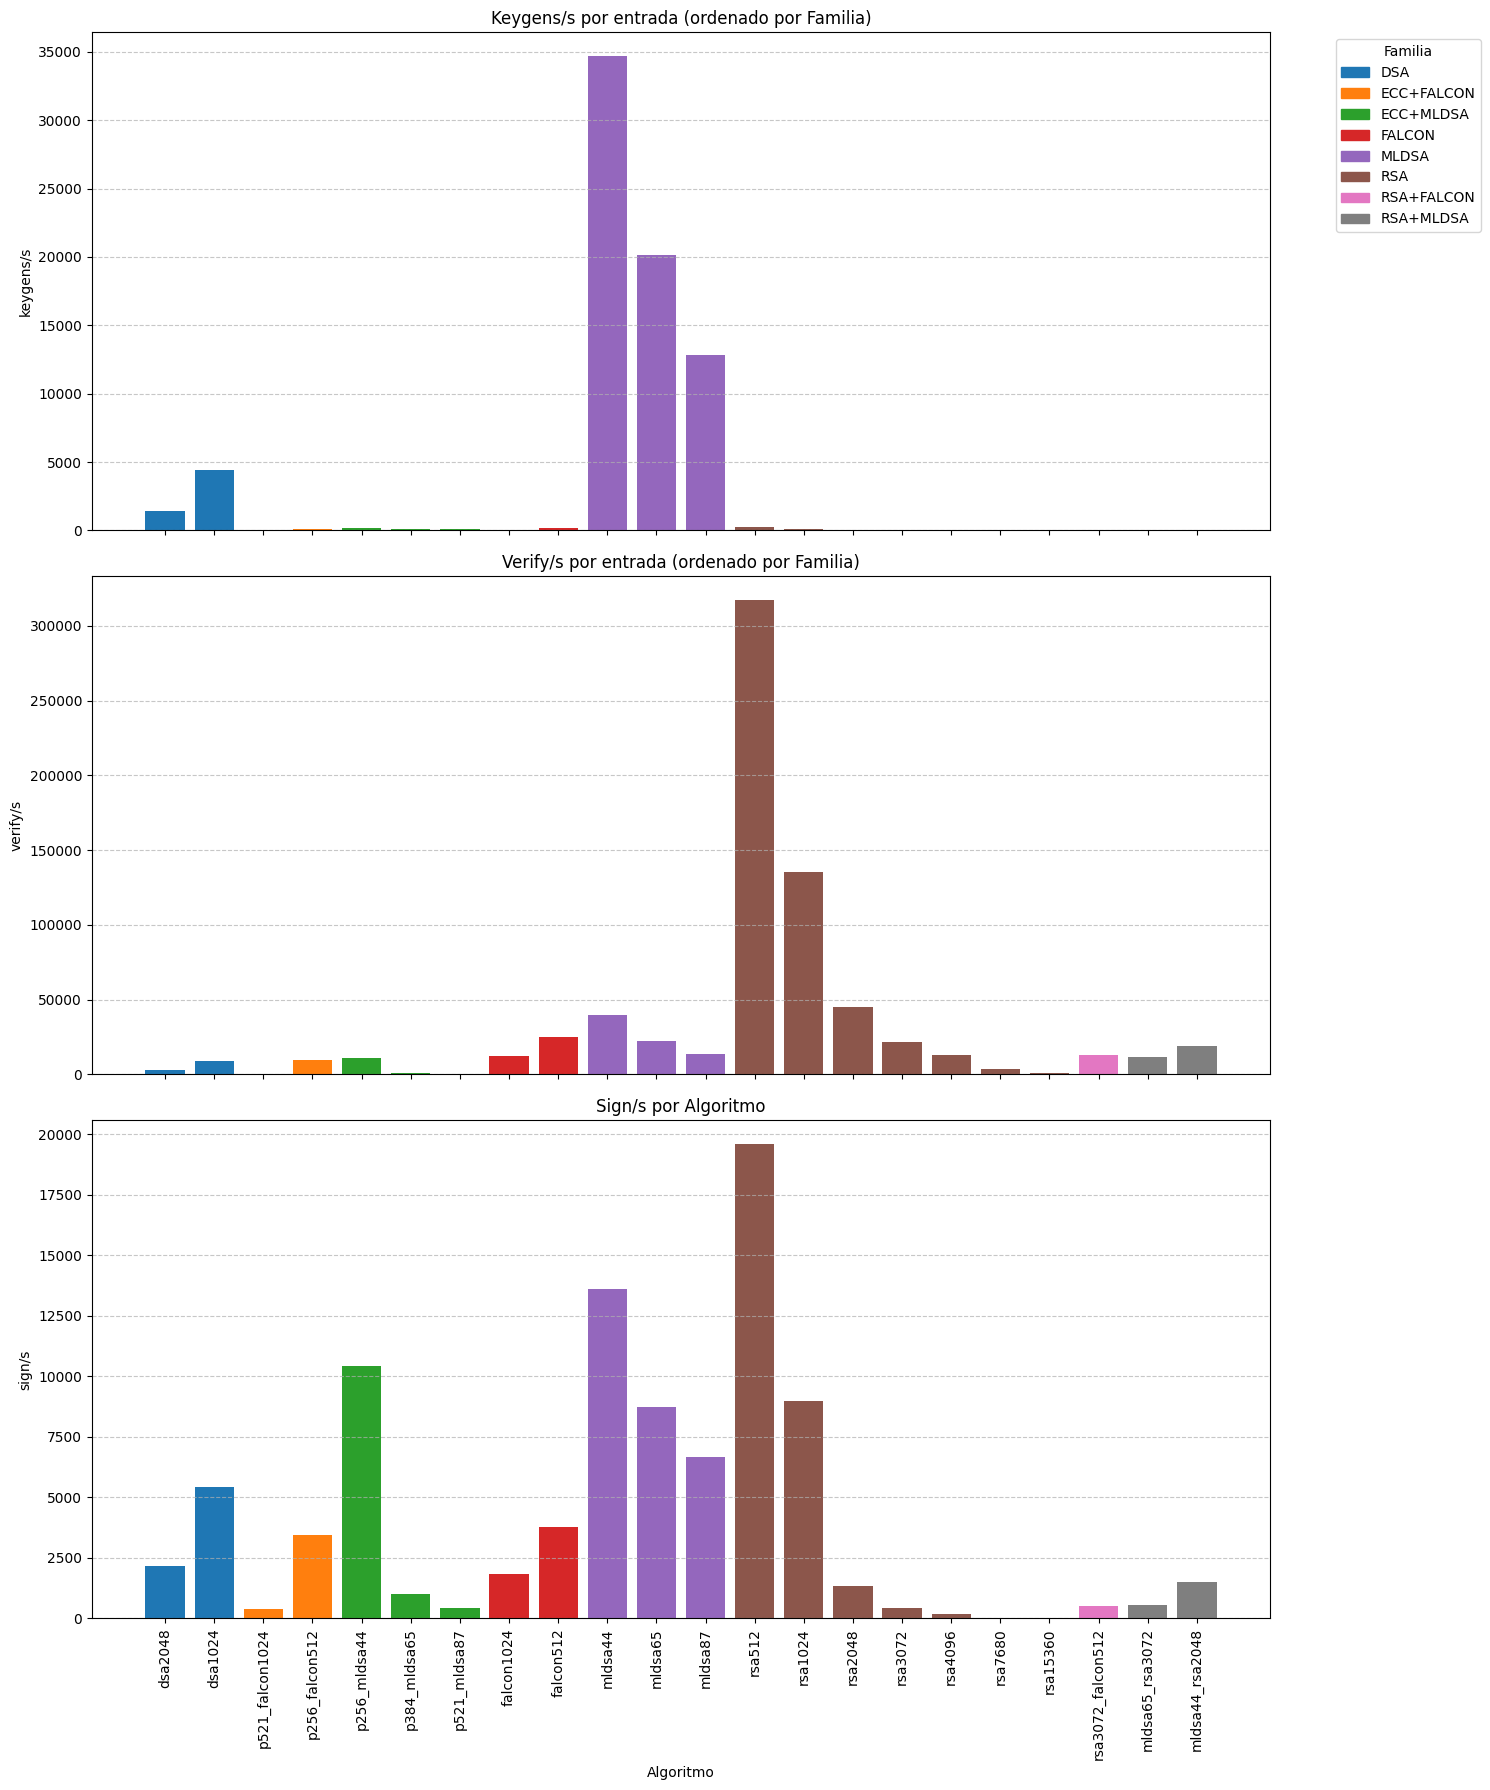

In [47]:
# Ordenar dataframe por Familia para agrupar las barras
df_sorted = df_firma.sort_values("Familia").reset_index(drop=True)

# Obtener familias únicas ordenadas y asignarles colores con paleta
familias = df_sorted["Familia"].unique()
palette = sns.color_palette("tab10", len(familias))
color_map = dict(zip(familias, palette))

# Crear lista de colores por fila según su familia
colors = df_sorted["Familia"].map(color_map)

fig, axes = plt.subplots(3, 1, figsize=(15, 18), sharex=True)

# Keygens/s
axes[0].bar(df_sorted.index, df_sorted["keygens/s"], color=colors)
axes[0].set_ylabel("keygens/s")
axes[0].set_title("Keygens/s por entrada (ordenado por Familia)")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Verify/s
axes[1].bar(df_sorted.index, df_sorted["verify/s"], color=colors)
axes[1].set_ylabel("verify/s")
axes[1].set_title("Verify/s por entrada (ordenado por Familia)")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Sign/s
axes[2].bar(df_sorted.index, df_sorted["sign/s"], color=colors)
axes[2].set_ylabel("sign/s")
axes[2].set_title("Sign/s por Algoritmo")
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas eje X con Algoritmo
algoritmos = df_sorted["Algoritmo"]
axes[2].set_xticks(df_sorted.index)
axes[2].set_xticklabels(algoritmos, rotation=90)

plt.xlabel("Algoritmo")

# Crear leyenda de familias con sus colores
from matplotlib.patches import Patch
legend_handles = [Patch(color=color_map[fam], label=fam) for fam in familias]
axes[0].legend(handles=legend_handles, title="Familia", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


/tmp/ipython-input-48-2766297988.py:23: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,0.25)


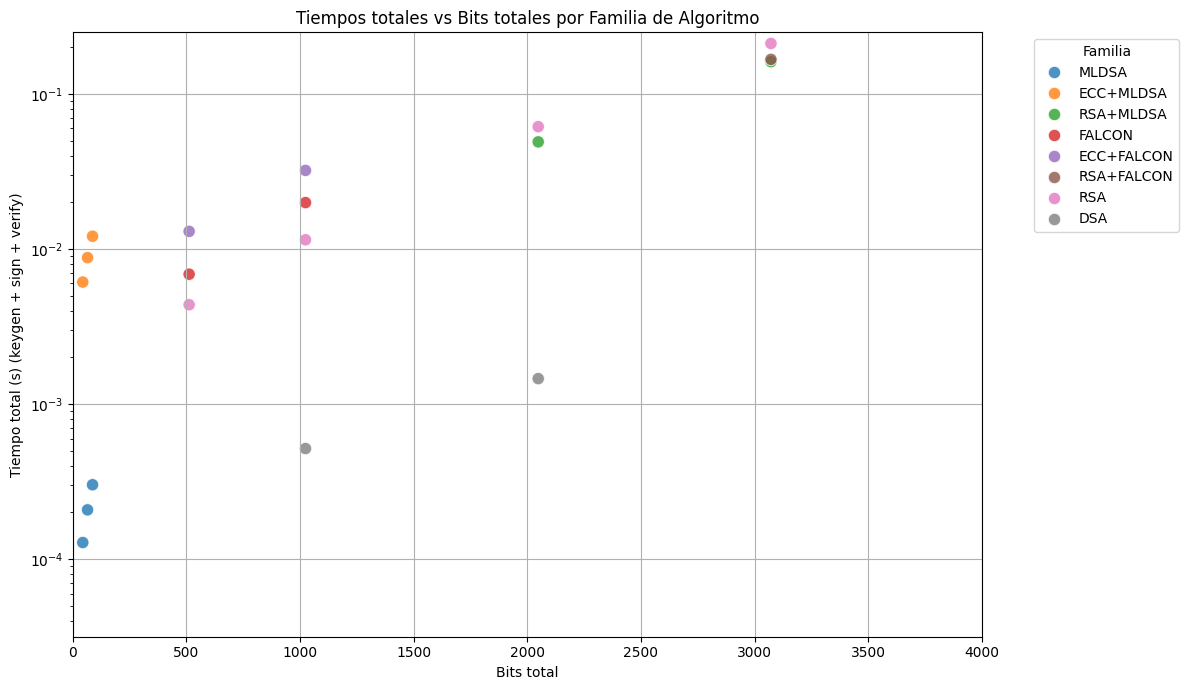

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_firma,
    x="Bits total",
    y="Tiempo total (s)",
    hue="Familia",
    palette="tab10",
    s=80,  # tamaño de puntos
    alpha=0.8,
)

plt.title("Tiempos totales vs Bits totales por Familia de Algoritmo")
plt.xlabel("Bits total")
plt.ylabel("Tiempo total (s) (keygen + sign + verify)")
plt.yscale('log')
plt.legend(title="Familia", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.xlim(0,4000)
plt.ylim(0,0.25)
plt.show()


# 3: Algoritmos de encapsulación de clave

| Característica                | **Key Exchange (KE)**                                        | **Key Encapsulation Mechanism (KEM)**                      |
| ----------------------------- | ------------------------------------------------------------ | ---------------------------------------------------------- |
| **Modelo clásico**            | Intercambio interactivo (ej. Diffie–Hellman).                | Esquema no interactivo derivado de cifrado asimétrico.     |
| **Interactividad**            | Requiere múltiples mensajes (ej. ida y vuelta).              | Generalmente un solo mensaje del emisor al receptor.       |
| **Ejemplo tradicional**       | Diffie–Hellman, ECDH.                                        | Kyber, BIKE, NTRU (post-cuánticos).                        |
| **Basado en**                 | Operaciones algebraicas (módulo primo, curvas).              | Cifrado público basado en estructuras como LWE, NTRU, etc. |
| **Salida**                    | Ambas partes computan la misma clave compartida.             | Receptor desencripta una clave encapsulada.                |
| **Popular en**                | TLS 1.2, SSH, IPsec.                                         | TLS 1.3 (KEMs en pruebas post-cuánticas), PQCrypto.        |
| **Resistencia cuántica**      | Tradicional KE es vulnerable a ataques cuánticos (Shor).     | Muchos KEMs son diseñados para ser **post-cuánticos**.     |
| **Ventaja de implementación** | A veces más simple y flexible para incorporar autenticación. | KEMs pueden ser más eficientes en entornos modernos.       |


https://medium.com/@hwupathum/using-crystals-kyber-kem-for-hybrid-encryption-with-java-0ab6c70d41fc

In [49]:
# Load all sheets into a dictionary of DataFrames
dfs = pd.read_excel(excel_file, sheet_name=None, engine="openpyxl")

df_kem = dfs['KEM']
df_kem['Algoritmo'] = df_kem['Algoritmo'].str.lower()
# Diccionario con renombramientos específicos
mapeo_renombrar = {
    'secp256r1mlkem768': 'p256_mlkem768',
    # Puedes añadir más mapeos si quieres
}

# Aplicar reemplazo en la columna 'Algoritmo' (ajusta nombre si es otra columna)
df_kem['Algoritmo'] = df_kem['Algoritmo'].replace(mapeo_renombrar)

df_kem = df_kem.sort_values(by="Algoritmo").reset_index(drop=True)

# Quitar la 's' al final de las columnas de tiempo (keygen, encaps, decaps)
for col in ['keygen', 'encaps', 'decaps']:
    df_kem[col] = df_kem[col].str.replace('s', '', regex=False).astype(float)
# Calcular tiempo total (keygen + encaps + decaps)
df_kem['Tiempo total'] = df_kem[['keygen', 'encaps', 'decaps']].sum(axis=1)

df_kem.head(3)

,Algoritmo,keygen,encaps,decaps,keygens/s,encaps/s,decaps/s,Tiempo total
0,bikel1,0.000183,0.000038,0.000324,5464.6,26348.3,3082.2,0.000545
1,bikel3,0.000506,0.000078,0.001013,1976.7,12811.9,986.8,0.001597
2,bikel5,0.001233,0.000149,0.002778,810.9,6733.5,359.9,0.004160


| Operación | ¿Quién la hace?     | ¿Cuándo?                         | ¿Cuántas veces?                      | Comentario                                                            |
| --------- | ------------------- | -------------------------------- | ------------------------------------ | --------------------------------------------------------------------- |
| `keygen`  | Receptor (servidor) | **Antes** de usar el KEM         | 1 vez (por sesión o por uso del KEM) | Generalmente se genera una sola vez, se reutiliza durante una sesión. |
| `encaps`  | Emisor (cliente)    | **Cada vez** que envía una clave | 1 vez por mensaje o conexión         | Suele hacerse por cada nuevo intercambio de clave.                    |
| `decaps`  | Receptor (servidor) | Tras recibir el mensaje          | 1 vez por encapsulación              | Se realiza cada vez que se recibe una clave encapsulada.              |


## 3.1. RSA

### Procesamiento.

In [50]:
# Extraer las filas que contienen "rsa"
mask_rsa = df_kem['Algoritmo'].str.contains(r'rsa', case=False, na=False)

# Asignar la familia
df_kem.loc[mask_rsa, 'Familia'] = 'RSA'
# Asignar la familia
df_kem.loc[mask_rsa, 'AlgoritmoPrincipal'] = 'RSA'


# Extraer los bits del nombre del algoritmo y convertir a entero
df_kem.loc[mask_rsa, 'Bits'] = df_kem.loc[mask_rsa, 'Algoritmo'].str.extract(r'(\d+)')[0].astype(float)

# Mostrar las filas afectadas
df_kem[mask_rsa]



,Algoritmo,keygen,encaps,decaps,keygens/s,encaps/s,decaps/s,Tiempo total,Familia,AlgoritmoPrincipal,Bits
42,rsa1024,0.008418,0.000007,0.000089,118.8,147800.3,11230.6,0.008514,RSA,RSA,1024.0
43,rsa15360,21.810000,0.000804,0.177759,0.0,1244.1,5.6,21.988563,RSA,RSA,15360.0
44,rsa2048,0.042263,0.000019,0.000269,23.7,51410.3,3718.2,0.042551,RSA,RSA,2048.0
45,rsa3072,0.142162,0.000039,0.000752,7.0,25905.6,1330.7,0.142953,RSA,RSA,3072.0
46,rsa4096,0.521000,0.000063,0.001611,1.9,15991.2,620.8,0.522674,RSA,RSA,4096.0
47,rsa512,0.002800,0.000004,0.000034,357.1,282509.2,29611.3,0.002838,RSA,RSA,512.0
48,rsa7680,8.000000,0.000207,0.035679,0.1,4831.1,28.0,8.035886,RSA,RSA,7680.0


### Gráficas.

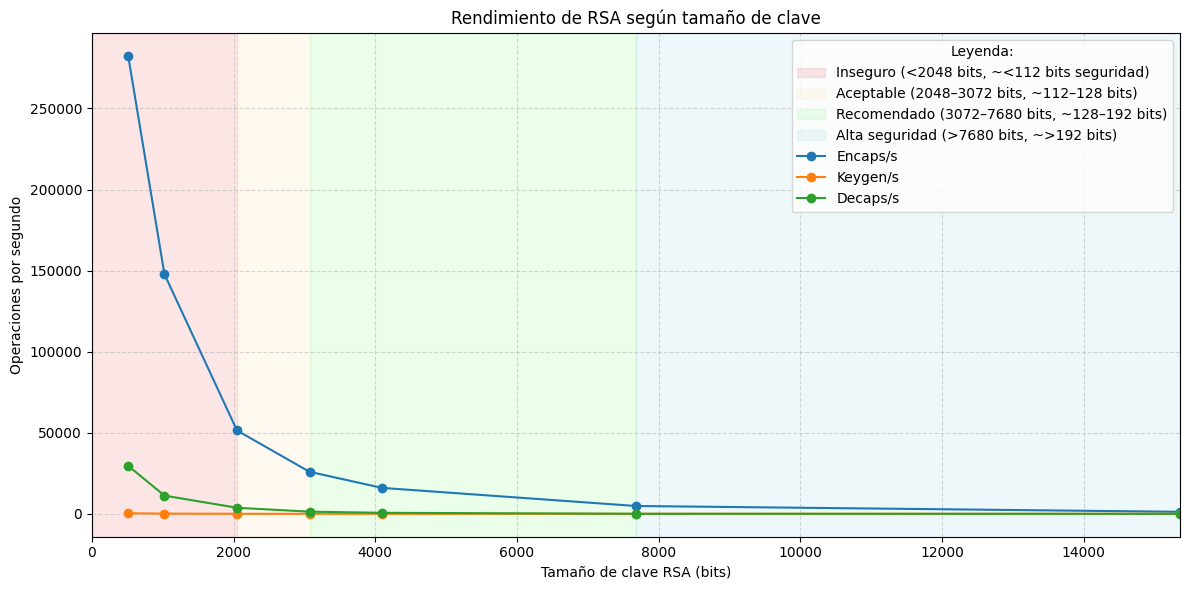

In [51]:

# Filtrar y ordenar los datos de RSA
df_rsa = df_kem[df_kem['Familia'] == 'RSA'].sort_values(by='Bits')

# Crear la figura
plt.figure(figsize=(12, 6))

# Definir los límites para franjas según tamaño de clave RSA
lims = [0, 2048, 3072, 7680, df_rsa["Bits"].max()]
colors = ['lightcoral', 'moccasin', 'palegreen', 'lightblue']
labels = [
    'Inseguro (<2048 bits, ~<112 bits seguridad)',
    'Aceptable (2048–3072 bits, ~112–128 bits)',
    'Recomendado (3072–7680 bits, ~128–192 bits)',
    'Alta seguridad (>7680 bits, ~>192 bits)'
]

# Pintar fondo coloreado según franjas
for i in range(len(lims) - 1):
    plt.axvspan(lims[i], lims[i+1], color=colors[i], alpha=0.2, label=labels[i])

# Graficar rendimiento de RSA
plt.plot(df_rsa["Bits"], df_rsa["encaps/s"], marker="o", linestyle="-", label="Encaps/s")
plt.plot(df_rsa["Bits"], df_rsa["keygens/s"], marker="o", linestyle="-", label="Keygen/s")
plt.plot(df_rsa["Bits"], df_rsa["decaps/s"], marker="o", linestyle="-", label="Decaps/s")

# Etiquetas y estilo
plt.xlabel("Tamaño de clave RSA (bits)")
plt.ylabel("Operaciones por segundo")
plt.title("Rendimiento de RSA según tamaño de clave")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlim(0,  df_rsa["Bits"].max())

# Mover la leyenda fuera del gráfico y añadir título
plt.legend(title="Leyenda:",  loc="upper right")

plt.tight_layout()
plt.show()


## 3.2. Elliptic Curve Parameters

### Procesamiento.

In [52]:
mask_ecc = df_kem['Algoritmo'].str.contains(r'ecp-|X448|X25519|p\d{3}', case=False, na=False)

df_kem.loc[mask_ecc, 'Familia'] = 'ECC'
# Asignar la familia
df_kem.loc[mask_ecc, 'AlgoritmoPrincipal'] = 'ECC'

def extraer_bits_ecc(alg):
    m = re.search(r'(?:p|x|ecp-)(\d{3})', alg, re.IGNORECASE)
    if m:
        return int(m.group(1))
    else:
        return None

df_kem.loc[mask_ecc, 'Bits'] = df_kem.loc[mask_ecc, 'Algoritmo'].apply(extraer_bits_ecc)

# Diccionario con familias PQC y patrones
familias_pqc = {
    'MLKEM': r'mlkem',
    'FrodoKEM': r'frodo',
    'HQC': r'hqc',
    'BIKE': r'bike',
    'Kyber': r'kyber',
}

# Asignar familias PQC y algoritmo principal
for fam, pattern in familias_pqc.items():
    mask = df_kem['Algoritmo'].str.contains(pattern, case=False, na=False)

    # ECC+FAMILIA → híbrido
    mask_ecc = mask & (df_kem['Familia'] == 'ECC')
    df_kem.loc[mask_ecc, 'Familia'] = 'ECC+' + fam
    df_kem.loc[mask_ecc, 'AlgoritmoPrincipal'] = fam

    # FAMILIA sola (no ECC)
    mask_solo = mask & (~df_kem['Familia'].isin(['ECC', 'ECC+' + fam]))
    df_kem.loc[mask_solo, 'Familia'] = fam
    df_kem.loc[mask_solo, 'AlgoritmoPrincipal'] = fam

# Paso 3: Ordenar por Bits descendente
df_kem = df_kem.sort_values(by='Bits', ascending=False)
mapeo_renombrar = {
    'secp256r1mlkem768': 'p256_mlkem768',
    # Puedes añadir más mapeos si quieres
}

# Aplicar reemplazo en la columna 'Algoritmo' (ajusta nombre si es otra columna)
df_kem['Algoritmo'] = df_kem['Algoritmo'].replace(mapeo_renombrar)

`ECP-256, ECP-384, ECP-521` usan curvas elípticas clásicas (NIST P-curves), con coordenadas (x, y) y generalmente curvas sobre campos primos.

`X25519 y X448` usan curvas de Montgomery (Curve25519 y Curve448) que son una variante especial de curvas elípticas, optimizadas para eficiencia y seguridad en intercambios de claves.

### Gráficas.

In [53]:
# Filtrar por algoritmos de tipo ECC
df_ecc = df_kem[df_kem['Familia'] == 'ECC'].copy()

# Ordenar por tiempo total
df_ecc = df_ecc.sort_values(by='Bits', ascending=True)

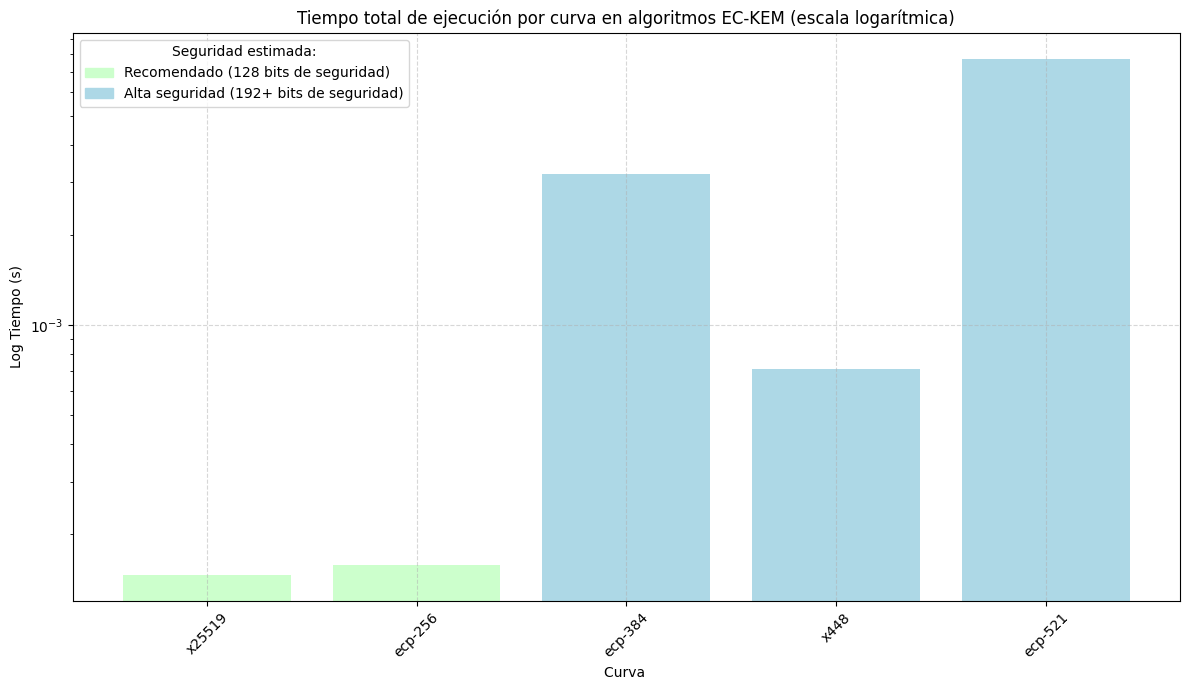

In [54]:
# Asignamos manualmente los bits de seguridad estimados
seguridad_bits = {
    'x25519': 128,
    'ecp-256': 128,
    'x448': 224,
    'ecp-384': 192,
    'ecp-521': 256
}

# Clasificación basada en bits de seguridad estimados
def clasificar_seguridad(bits_seg):
    if bits_seg < 112:
        return 'Inseguro'
    elif bits_seg < 128:
        return 'Aceptable'
    elif bits_seg == 128:
        return 'Recomendado (128 bits de seguridad)'
    else:
        return 'Alta seguridad (192+ bits de seguridad)'

# Colores asociados a clasificación
colores_seguridad = {
    'Recomendado (128 bits de seguridad)': '#ccffcc',
    'Alta seguridad (192+ bits de seguridad)': '#add8e6'
}

# Agregar columnas al DataFrame
df_ecc['Bits de seguridad estimados'] = df_ecc['Algoritmo'].map(seguridad_bits)
df_ecc['Clasificación'] = df_ecc['Bits de seguridad estimados'].apply(clasificar_seguridad)
df_ecc['Color'] = df_ecc['Clasificación'].map(colores_seguridad)


# Crear gráfico de barras
plt.figure(figsize=(12, 7))
bars = plt.bar(
    df_ecc['Algoritmo'],
    df_ecc['Tiempo total'],
    color=df_ecc['Color']
)


# Ejes y estilos
plt.xlabel('Curva ')
plt.ylabel('Log Tiempo (s)')
plt.title('Tiempo total de ejecución por curva en algoritmos EC-KEM (escala logarítmica)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.yscale('log')
# Leyenda fuera del gráfico
leyenda = [Patch(color=col, label=label) for label, col in colores_seguridad.items()]
plt.legend(
    handles=leyenda,
    title='Seguridad estimada:',
    loc='upper left'
)

plt.tight_layout()
plt.show()

## 3.3. FrodoKEM

`frodo1344aes, frodo1344shake, frodo640aes, frodo640shake, frodo976aes, frodo976shake` pertenecen a la familia FrodoKEM.

FrodoKEM es un esquema de cifrado de clave pública basado en el problema del Learning With Errors (LWE), que es uno de los problemas matemáticos considerados seguros incluso frente a ataques con computación cuántica.


Los números en los nombres, como 1344, 640, 976, indican el tamaño de los parámetros

Las terminaciones aes y shake indican qué función hash o cifrado simétrico se usa internamente para la generación de claves y aleatoriedad:

* aes usa AES (Advanced Encryption Standard).

* shake usa SHAKE (una función de extendido de salida basada en el estándar SHA-3).

| Algoritmo      | Basado en | Seguridad  | Tipo de hash | Uso principal                        |
| -------------- | --------- | ---------- | ------------ | ------------------------------------ |
| frodo1344aes   | LWE       | Alta       | AES          | Intercambio de claves post-cuántico  |
| frodo1344shake | LWE       | Alta       | SHAKE        | Igual que anterior                   |
| frodo640aes    | LWE       | Media      | AES          | Variante con parámetros más pequeños |
| frodo640shake  | LWE       | Media      | SHAKE        | Igual que anterior                   |
| frodo976aes    | LWE       | Intermedia | AES          | Variante intermedia                  |
| frodo976shake  | LWE       | Intermedia | SHAKE        | Igual que anterior                   |


### Procesamiento.

In [55]:
# Paso 3: Segunda pasada para variantes específicas (sobre todo Frodo)
variantes = {
    'AES': r'aes',
    'SHAKE': r'shake',
}

for sufijo, patron in variantes.items():
    mask_var = df_kem['Algoritmo'].str.contains(patron, case=False, na=False)
    df_kem.loc[mask_var, 'Familia'] = df_kem.loc[mask_var, 'Familia'] + '+' + sufijo

# Paso 4: Ordenar por Bits descendente
df_kem = df_kem.sort_values(by='Familia')
df_kem

,Algoritmo,keygen,encaps,decaps,keygens/s,encaps/s,decaps/s,Tiempo total,Familia,AlgoritmoPrincipal,Bits
2,bikel5,0.001233,0.000149,0.002778,810.9,6733.5,359.9,0.004160,BIKE,BIKE,NaN
1,bikel3,0.000506,0.000078,0.001013,1976.7,12811.9,986.8,0.001597,BIKE,BIKE,NaN
0,bikel1,0.000183,0.000038,0.000324,5464.6,26348.3,3082.2,0.000545,BIKE,BIKE,NaN
4,ecp-384,0.000784,0.001577,0.000819,1275.6,634.2,1220.3,0.003180,ECC,ECC,384.0
5,ecp-521,0.001892,0.003889,0.001959,528.7,257.1,510.4,0.007740,ECC,ECC,521.0
...,...,...,...,...,...,...,...,...,...,...,...
44,rsa2048,0.042263,0.000019,0.000269,23.7,51410.3,3718.2,0.042551,RSA,RSA,2048.0
45,rsa3072,0.142162,0.000039,0.000752,7.0,25905.6,1330.7,0.142953,RSA,RSA,3072.0
46,rsa4096,0.521000,0.000063,0.001611,1.9,15991.2,620.8,0.522674,RSA,RSA,4096.0
48,rsa7680,8.000000,0.000207,0.035679,0.1,4831.1,28.0,8.035886,RSA,RSA,7680.0


### Gráficas.

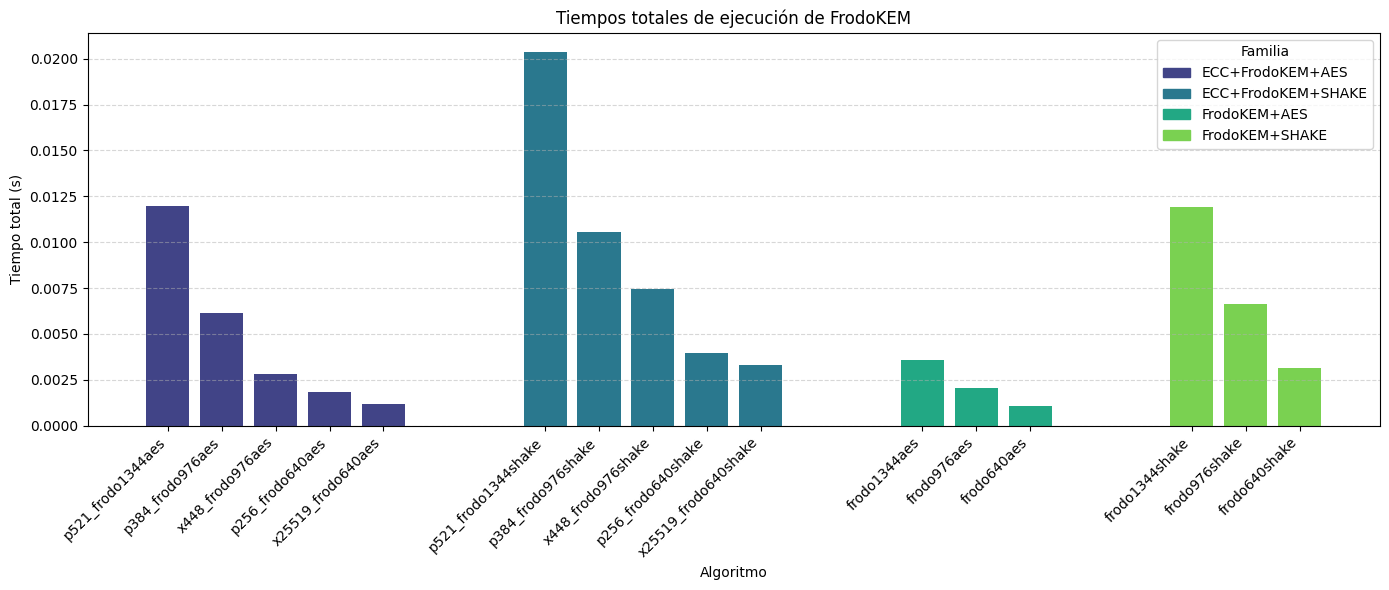

In [56]:

# Filtrar filas con 'frodo' en Algoritmo (case-insensitive)
df_frodo = df_kem[df_kem['Algoritmo'].str.contains('frodo', case=False, na=False)].copy()

# Calcular tiempo total (keygen + encaps + decaps)
df_frodo['tiempo_total'] = df_frodo[['keygen', 'encaps', 'decaps']].sum(axis=1)

# Ordenar primero por Familia (alfabético), luego por tiempo_total descendente
df_frodo = df_frodo.sort_values(by=['Familia', 'tiempo_total'], ascending=[True, False])

familias = df_frodo['Familia'].unique()
palette = sns.color_palette("viridis", n_colors=len(familias))
color_map = dict(zip(familias, palette))

# Crear posiciones para barras agrupadas por familia
bar_width = 0.8
gap_between_families = 2
positions = []
current_pos = 0

# Guardar ticks y etiquetas para el eje x
xticks = []
xlabels = []

for fam in familias:
    df_fam = df_frodo[df_frodo['Familia'] == fam]
    n = len(df_fam)
    pos_family = list(range(current_pos, current_pos + n))
    positions.extend(pos_family)
    xticks.extend(pos_family)
    xlabels.extend(df_fam['Algoritmo'])
    current_pos += n + gap_between_families  # espacio entre familias

# Graficar
plt.figure(figsize=(14,6))
bars = plt.bar(positions, df_frodo['tiempo_total'], color=df_frodo['Familia'].map(color_map), width=bar_width)

plt.xticks(xticks, xlabels, rotation=45, ha='right')
plt.xlabel('Algoritmo')
plt.ylabel('Tiempo total (s)')
plt.title('Tiempos totales de ejecución de FrodoKEM')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Leyenda
legend_handles = [Patch(color=color_map[fam], label=fam) for fam in familias]
plt.legend(handles=legend_handles, title='Familia')

plt.tight_layout()
plt.show()


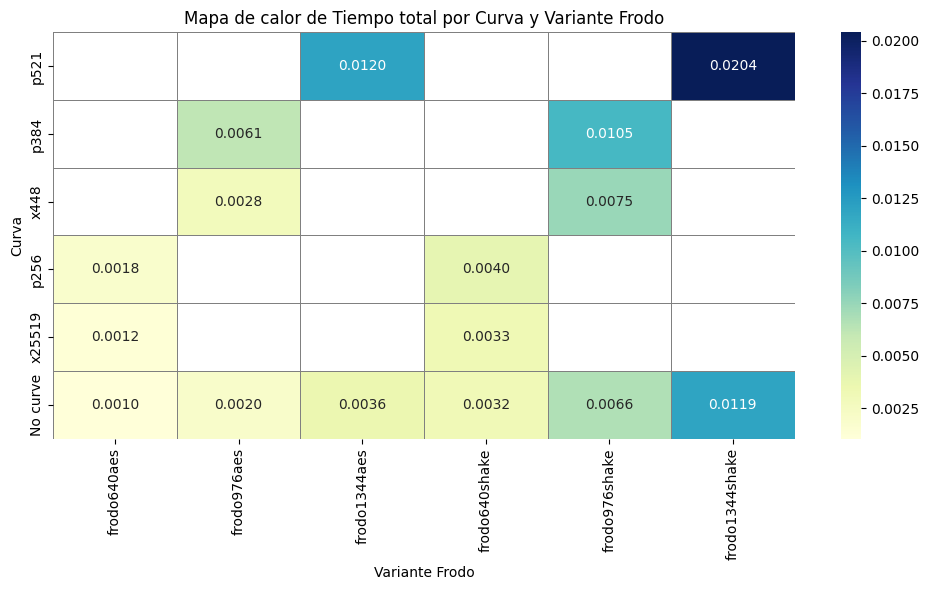

In [57]:
# Filtrar algoritmos Frodo híbridos con curvas o sin curva (todas las filas con 'frodo')
df_frodo = df_kem[df_kem['Algoritmo'].str.contains('frodo', case=False)].copy()

# Extraer nombre de la curva, asignar 'No curve' si no tiene
df_frodo['Curva'] = df_frodo['Algoritmo'].str.extract(r'^(x25519|p256|p384|x448|p521)', expand=False)
df_frodo['Curva'] = df_frodo['Curva'].fillna('No curve')

# Extraer variante Frodo (frodo###aes/shake)
df_frodo['FrodoVariant'] = df_frodo['Algoritmo'].str.extract(r'(frodo\d+(aes|shake))', expand=False)[0]

# Calcular tiempo total si no existe
if 'Tiempo total' not in df_frodo.columns:
    df_frodo['Tiempo total'] = df_frodo[['keygen', 'encaps', 'decaps']].sum(axis=1)

# Crear tabla dinámica con promedio para evitar duplicados
tabla_frodo = df_frodo.pivot_table(
    index='Curva',
    columns='FrodoVariant',
    values='Tiempo total',
    aggfunc='mean'
)

# Ordenar filas y columnas incluyendo 'No curve'
orden_curvas = ['p521', 'p384', 'x448', 'p256', 'x25519', 'No curve']
orden_columnas = ['frodo640aes', 'frodo976aes', 'frodo1344aes', 'frodo640shake', 'frodo976shake', 'frodo1344shake']

tabla_frodo = tabla_frodo.reindex(index=orden_curvas, columns=orden_columnas)

# Graficar mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_frodo, annot=True, fmt=".4f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Mapa de calor de Tiempo total por Curva y Variante Frodo")
plt.xlabel("Variante Frodo")
plt.ylabel("Curva")
plt.tight_layout()
plt.show()

## 3.4. MLKEM / Kyber

ML-KEM (Module Lattice Key Encapsulation Mechanism) es un algoritmo criptográfico post-cuántico, es decir, diseñado para resistir ataques incluso de computadoras cuánticas. Fue seleccionado por el NIST como el estándar de cifrado de clave pública post-cuántico, y se basa en la familia de algoritmos conocida como Kyber.

Niveles de ML-KEM:
* ML-KEM-512 – Seguridad similar a AES-128

* ML-KEM-768 – Seguridad similar a AES-192

* ML-KEM-1024 – Seguridad similar a AES-256

### Procesamiento.

In [58]:
# Filtrar por AlgoritmoPrincipal
df_mlkem = df_kem[df_kem['AlgoritmoPrincipal'] == 'MLKEM'].copy()
df_kyber = df_kem[df_kem['AlgoritmoPrincipal'] == 'Kyber'].copy()

df_mlkem['Curva'] = df_mlkem['Algoritmo'].str.replace('mlkem', ' ', case=False, regex=False)


df_kyber['Curva'] = df_kyber['Algoritmo'].str.replace('kyber', ' ', case=False, regex=False)
df_kyber = df_kyber.set_index('Curva')
df_mlkem = df_mlkem.set_index('Curva')


df_merged = df_kyber.join(df_mlkem, how='inner', lsuffix='_kyber', rsuffix='_mlkem')


### Gráficas.

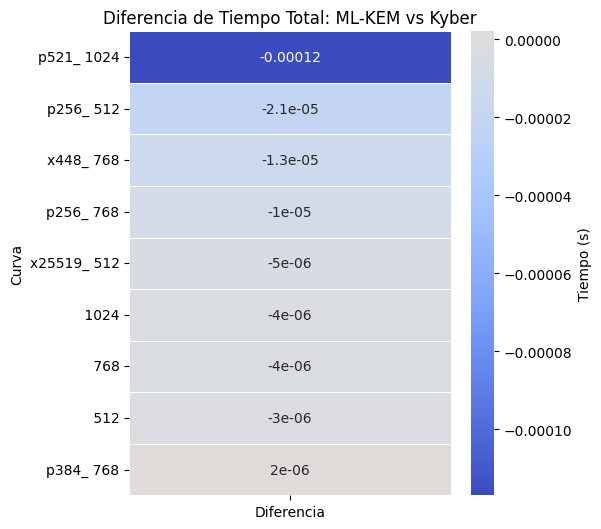

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la diferencia y convertir en DataFrame para el heatmap
df_diff = (df_merged['Tiempo total_mlkem'] - df_merged['Tiempo total_kyber']).to_frame(name='Diferencia')
# Ordenar por valor de la diferencia
df_diff = df_diff.sort_values(by='Diferencia')
# Crear heatmap
plt.figure(figsize=(6, len(df_diff)*0.6))
sns.heatmap(df_diff, annot=True, cmap='coolwarm', center=0, linewidths=0.5, cbar_kws={'label': 'Tiempo (s)'})

plt.title("Diferencia de Tiempo Total: ML-KEM vs Kyber")
plt.xlabel("")
plt.ylabel("Curva")
plt.tight_layout()
plt.show()


Se elimina Kyber, por ser una versión desactualizada.

In [60]:
df_kem = df_kem[~df_kem['Familia'].isin(['Kyber', 'ECC+Kyber'])].reset_index(drop=True)


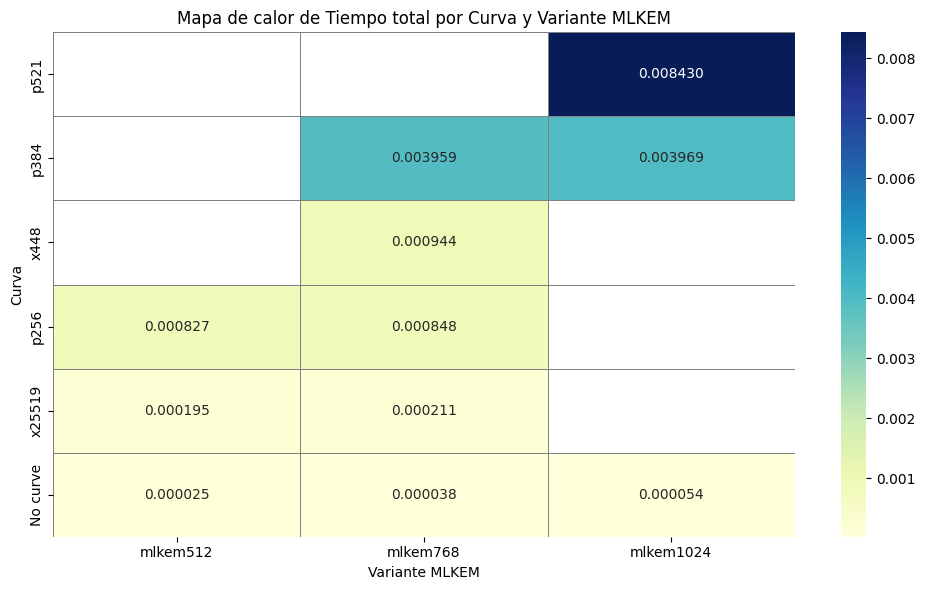

In [61]:
# Filtrar MLKEM (case insensible)
df_mlkem = df_kem[df_kem['Algoritmo'].str.contains('mlkem', case=False)].copy()

# Extraer curva o poner 'No curve'
df_mlkem['Curva'] = df_mlkem['Algoritmo'].str.extract(r'^(x25519|p256|p384|x448|p521)', expand=False)
df_mlkem['Curva'] = df_mlkem['Curva'].fillna('No curve')

# Extraer variante MLKEM (mlkem###, case insensible)
df_mlkem['MLKEMVariant'] = df_mlkem['Algoritmo'].str.extract(r'(mlkem\d+)', flags=re.IGNORECASE, expand=False).str.lower()

# Pivot table con promedio para evitar duplicados
tabla_mlkem = df_mlkem.pivot_table(
    index='Curva',
    columns='MLKEMVariant',
    values='Tiempo total',  # o la métrica que quieras
    aggfunc='mean'
)

# Ordenar filas y columnas
orden_filas = ['p521',  'p384', 'x448','p256', 'x25519', 'No curve']
orden_columnas = ['mlkem512', 'mlkem768', 'mlkem1024']

tabla_mlkem = tabla_mlkem.reindex(index=orden_filas)
tabla_mlkem = tabla_mlkem[orden_columnas]

# Graficar heatmap
plt.figure(figsize=(10,6))
sns.heatmap(tabla_mlkem, annot=True, fmt=".6f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Mapa de calor de Tiempo total por Curva y Variante MLKEM")
plt.xlabel("Variante MLKEM")
plt.ylabel("Curva")
plt.tight_layout()
plt.show()

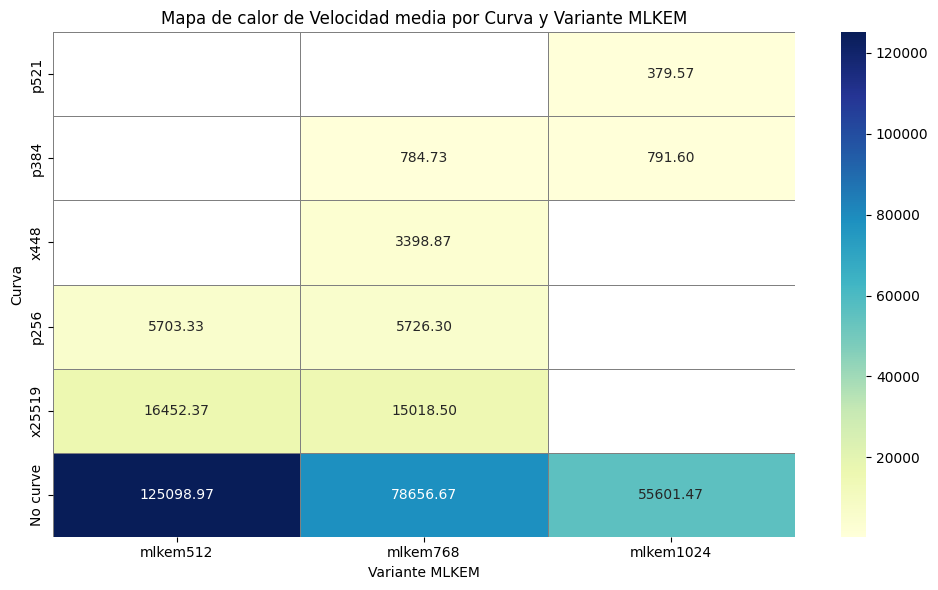

In [62]:


# Filtrar MLKEM (case insensible)
df_mlkem = df_kem[df_kem['Algoritmo'].str.contains('mlkem', case=False)].copy()

# Extraer curva o poner 'No curve'
df_mlkem['Curva'] = df_mlkem['Algoritmo'].str.extract(r'^(x25519|p256|p384|x448|p521)', expand=False)
df_mlkem['Curva'] = df_mlkem['Curva'].fillna('No curve')

# Extraer variante MLKEM (mlkem###, case insensible)
df_mlkem['MLKEMVariant'] = df_mlkem['Algoritmo'].str.extract(r'(mlkem\d+)', flags=re.IGNORECASE, expand=False).str.lower()

# Calcular la media de velocidad (keygen/s, decaps/s, encaps/s)
df_mlkem['Velocidad media'] = df_mlkem[['keygens/s', 'decaps/s', 'encaps/s']].mean(axis=1)

# Pivot table con promedio para evitar duplicados, usando 'Velocidad media'
tabla_mlkem = df_mlkem.pivot_table(
    index='Curva',
    columns='MLKEMVariant',
    values='Velocidad media',
    aggfunc='mean'
)

# Ordenar filas y columnas
orden_filas = ['p521',  'p384', 'x448','p256', 'x25519', 'No curve']
orden_columnas = ['mlkem512', 'mlkem768', 'mlkem1024']

tabla_mlkem = tabla_mlkem.reindex(index=orden_filas)
tabla_mlkem = tabla_mlkem[orden_columnas]

# Graficar heatmap
plt.figure(figsize=(10,6))
sns.heatmap(tabla_mlkem, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Mapa de calor de Velocidad media por Curva y Variante MLKEM")
plt.xlabel("Variante MLKEM")
plt.ylabel("Curva")
plt.tight_layout()
plt.show()


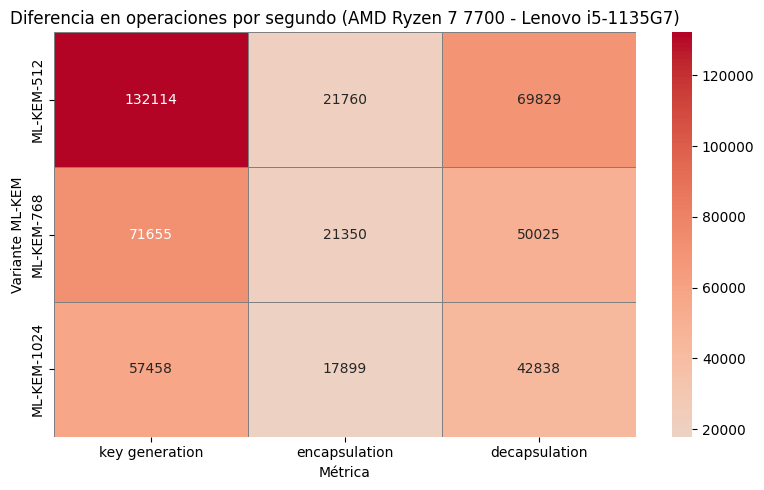

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos de AMD Ryzen 7 7700
data_amd = {
    'ML-KEM': ['ML-KEM-512', 'ML-KEM-768', 'ML-KEM-1024'],
    'key generation': [244000, 142000, 109000],
    'encapsulation': [153000, 103000, 77000],
    'decapsulation': [202000, 134000, 99000]
}
df_amd = pd.DataFrame(data_amd).set_index('ML-KEM')

# Datos del portátil Lenovo i5-1135G7
data_lenovo = {
    'ML-KEM': ['ML-KEM-512', 'ML-KEM-768', 'ML-KEM-1024'],
    'key generation': [111886.2, 70344.8, 51541.5],
    'encapsulation': [131239.6, 81650.1, 59101.4],
    'decapsulation': [132171.1, 83975.1, 56161.5]
}
df_lenovo = pd.DataFrame(data_lenovo).set_index('ML-KEM')

# Calcular diferencia (AMD - Lenovo)
df_diff = df_amd - df_lenovo

# Reordenar índice según lista dada
orden = ['ML-KEM-512', 'ML-KEM-768', 'ML-KEM-1024']
df_diff = df_diff.reindex(orden)

# Graficar heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_diff, annot=True, fmt=".0f", cmap="coolwarm", center=0, linewidths=0.5, linecolor='gray')
plt.title('Diferencia en operaciones por segundo (AMD Ryzen 7 7700 - Lenovo i5-1135G7)')
plt.ylabel('Variante ML-KEM')
plt.xlabel('Métrica')
plt.tight_layout()
plt.show()

## 3.5. BIKE y HQC

### Procesamiento.

(Ya se ha procesado junto con Curvas elípticas)

### Gráficas.

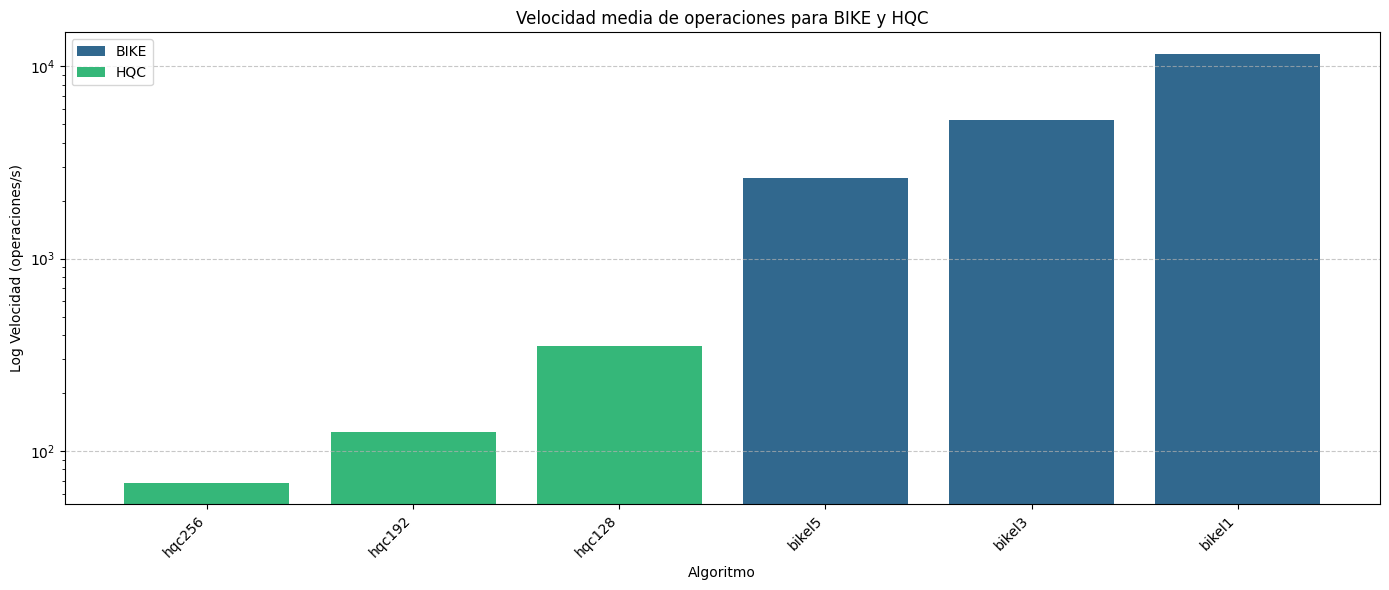

In [64]:
# Filtrar datos BIKE y HQC
df_bike = df_kem[df_kem['Familia'] == 'BIKE'].copy()
df_hqc = df_kem[df_kem['Familia'] == 'HQC'].copy()

# Calcular tiempo total
df_bike['Operaciones'] = df_bike[['keygens/s', 'encaps/s', 'decaps/s']].mean(axis=1)
df_hqc['Operaciones'] = df_hqc[['keygens/s', 'encaps/s', 'decaps/s']].mean(axis=1)

# Concatenar ambos dataframes
df_combined = pd.concat([df_bike, df_hqc], ignore_index=True)

df_combined = df_combined.sort_values('Operaciones')

# Paleta viridis para las dos familias
palette = sns.color_palette("viridis", n_colors=2)
color_map = {'BIKE': palette[0], 'HQC': palette[1]}

plt.figure(figsize=(14,6))
bars = plt.bar(df_combined['Algoritmo'], df_combined['Operaciones'], color=df_combined['Familia'].map(color_map))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.xlabel('Algoritmo')
plt.ylabel('Log Velocidad (operaciones/s)')
plt.title('Velocidad media de operaciones para BIKE y HQC')

# Leyenda
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color_map['BIKE'], label='BIKE'),
                   Patch(facecolor=color_map['HQC'], label='HQC')]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

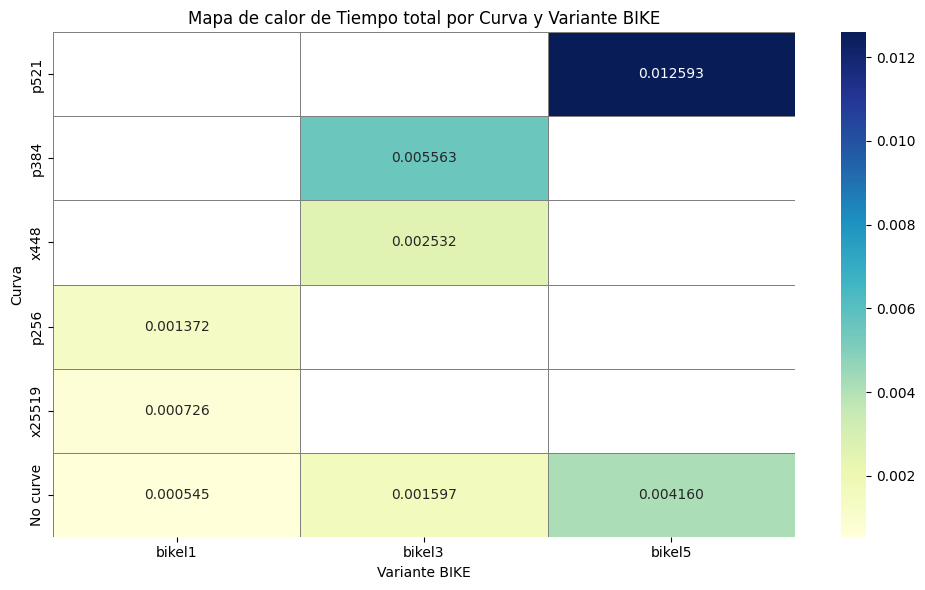

In [65]:
# Filtrar todos los algoritmos de la familia BIKE
df_bike = df_kem[df_kem['AlgoritmoPrincipal'] == 'BIKE'].copy()

# Extraer curva (o poner 'No curve' si no tiene)
df_bike['Curva'] = df_bike['Algoritmo'].str.extract(r'^(x25519|p256|p384|x448|p521)', expand=False)
df_bike['Curva'] = df_bike['Curva'].fillna('No curve')

# Extraer variante BIKE (bikel seguido de dígitos)
df_bike['BIKEVariant'] = df_bike['Algoritmo'].str.extract(r'(bikel\d+)', expand=False)

# Crear tabla pivot: filas=Curva, columnas=BIKEVariant, valores=Tiempo total (sin promedio)
tabla_bike = df_bike.pivot(index='Curva', columns='BIKEVariant', values='Tiempo total')

# Ordenar filas y columnas
orden_filas = ['p521',  'p384','x448', 'p256', 'x25519', 'No curve']
orden_columnas = sorted(tabla_bike.columns.tolist())  # orden alfabético variantes BIKE

tabla_bike = tabla_bike.reindex(index=orden_filas)
tabla_bike = tabla_bike[orden_columnas]

# Graficar mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_bike, annot=True, fmt=".6f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Mapa de calor de Tiempo total por Curva y Variante BIKE")
plt.xlabel("Variante BIKE")
plt.ylabel("Curva")
plt.tight_layout()
plt.show()


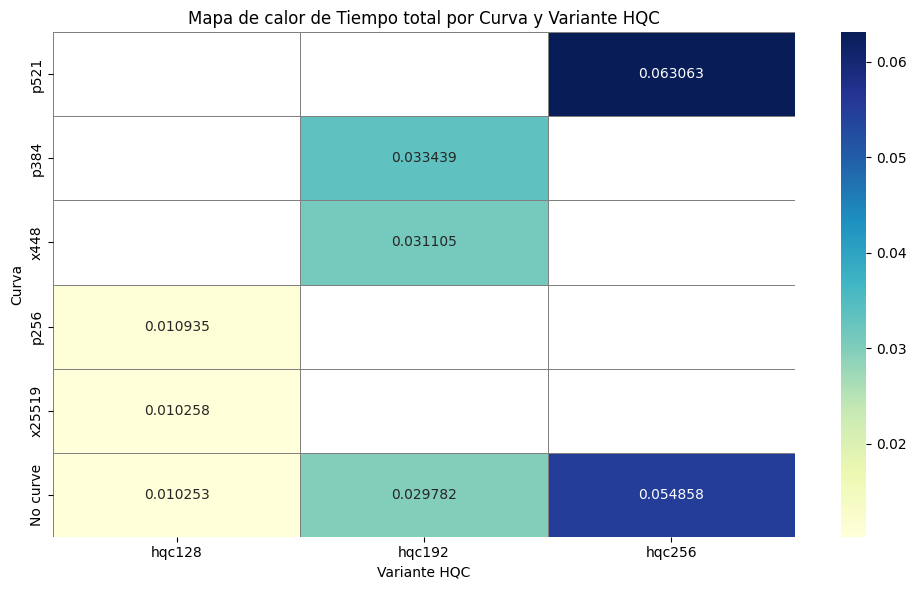

In [66]:
# Filtrar todos los HQC (familia principal HQC)
df_hqc = df_kem[df_kem['AlgoritmoPrincipal'] == 'HQC'].copy()

# Extraer curva (o poner 'No curve' si no tiene)
df_hqc['Curva'] = df_hqc['Algoritmo'].str.extract(r'^(x25519|p256|p384|x448|p521)')
df_hqc['Curva'] = df_hqc['Curva'].fillna('No curve')

# Extraer variante HQC (hqc###)
df_hqc['HQCVariant'] = df_hqc['Algoritmo'].str.extract(r'(hqc\d+)')

# Crear tabla pivot: filas=Curva, columnas=HQCVariant, valores=Tiempo total (sin promedio)
tabla_hqc = df_hqc.pivot(index='Curva', columns='HQCVariant', values='Tiempo total')

# Ordenar filas y columnas como quieras
orden_filas = ['p521', 'p384','x448',  'p256', 'x25519','No curve']
orden_columnas = sorted(tabla_hqc.columns.tolist())  # ordenar alfabéticamente variantes HQC

tabla_hqc = tabla_hqc.reindex(index=orden_filas)
tabla_hqc = tabla_hqc[orden_columnas]

# Graficar mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_hqc, annot=True, fmt=".6f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Mapa de calor de Tiempo total por Curva y Variante HQC")
plt.xlabel("Variante HQC")
plt.ylabel("Curva")
plt.tight_layout()
plt.show()

##3.6. Comparativa.

 ### Gráficas.

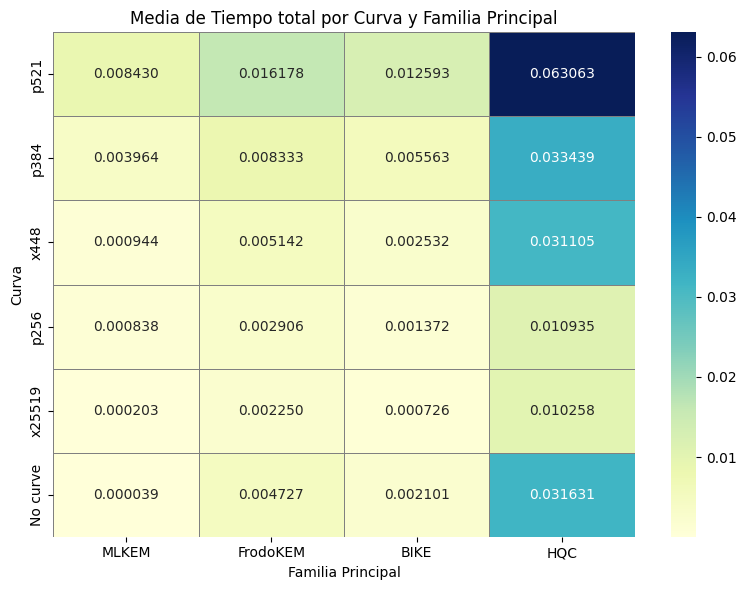

In [67]:
orden_filas = ['p521',  'p384','x448', 'p256', 'x25519', 'No curve']

def procesar_familia(df, familia, variante_regex=None):
    df_fam = df[df['AlgoritmoPrincipal'] == familia].copy()
    df_fam['Curva'] = df_fam['Algoritmo'].str.extract(r'^(x25519|p256|p384|x448|p521)', expand=False)
    df_fam['Curva'] = df_fam['Curva'].fillna('No curve')

    if variante_regex:
        df_fam['Variante'] = df_fam['Algoritmo'].str.extract(variante_regex, expand=False)
    else:
        df_fam['Variante'] = familia

    df_fam['value'] = df_fam['Tiempo total']

    tabla = df_fam.pivot_table(index='Curva', columns='Variante', values='value', aggfunc='mean')

    tabla = tabla.reindex(index=orden_filas)
    tabla['Media'] = tabla.mean(axis=1)

    return tabla['Media'].rename(familia)

media_bike = procesar_familia(df_kem, 'BIKE')
media_hqc = procesar_familia(df_kem, 'HQC', variante_regex=r'(hqc\d+)')
media_mlkem = procesar_familia(df_kem, 'MLKEM', variante_regex=r'(mlkem\d+)')
media_frodo = procesar_familia(df_kem, 'FrodoKEM', variante_regex=r'(frodo\d+(?:aes|shake))')

df_medias = pd.concat([media_mlkem, media_frodo, media_bike, media_hqc], axis=1)

plt.figure(figsize=(8, 6))
sns.heatmap(df_medias, annot=True, fmt=".6f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Media de Tiempo total por Curva y Familia Principal")
plt.xlabel("Familia Principal")
plt.ylabel("Curva")
plt.tight_layout()
plt.show()


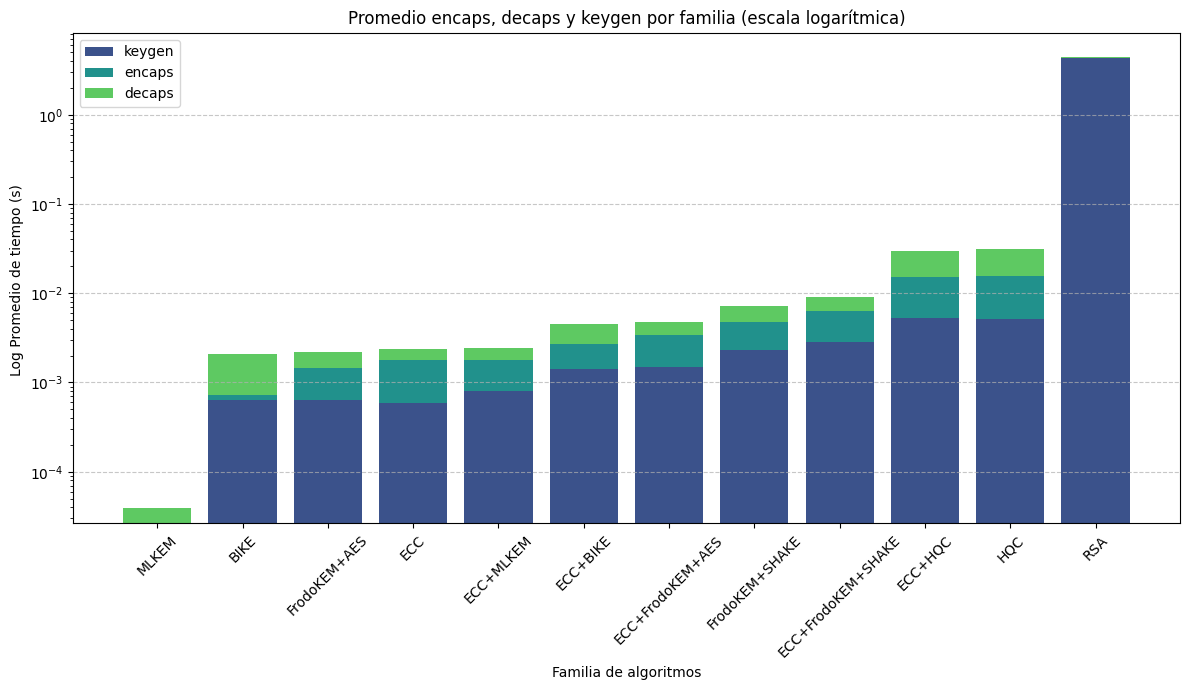

In [68]:

# Promedios ya calculados para encaps, decaps y keygen
encaps_avg = df_kem.groupby('Familia')['encaps'].mean()
decaps_avg = df_kem.groupby('Familia')['decaps'].mean()
keygen_avg = df_kem.groupby('Familia')['keygen'].mean()

# Crear DataFrame con los promedios
df_stacked = pd.DataFrame({
    'keygen': keygen_avg,
    'encaps': encaps_avg,
    'decaps': decaps_avg
}).fillna(0)

# Calcular total para ordenar y apilar
df_stacked['total'] = df_stacked.sum(axis=1)
df_stacked = df_stacked.sort_values('total')

familias = df_stacked.index
keygen = df_stacked['keygen'].values
encaps = df_stacked['encaps'].values
decaps = df_stacked['decaps'].values

x = np.arange(len(familias))

# Obtener 3 colores de la paleta viridis
palette = sns.color_palette('viridis', 3)

plt.figure(figsize=(12, 7))

plt.bar(x, keygen, label='keygen', color=palette[0])
plt.bar(x, encaps, bottom=keygen, label='encaps', color=palette[1])
plt.bar(x, decaps, bottom=keygen+encaps, label='decaps', color=palette[2])

plt.xticks(x, familias, rotation=45)
plt.ylabel('Log Promedio de tiempo (s) ')
plt.xlabel('Familia de algoritmos')
plt.title('Promedio encaps, decaps y keygen por familia (escala logarítmica)')
plt.legend()
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


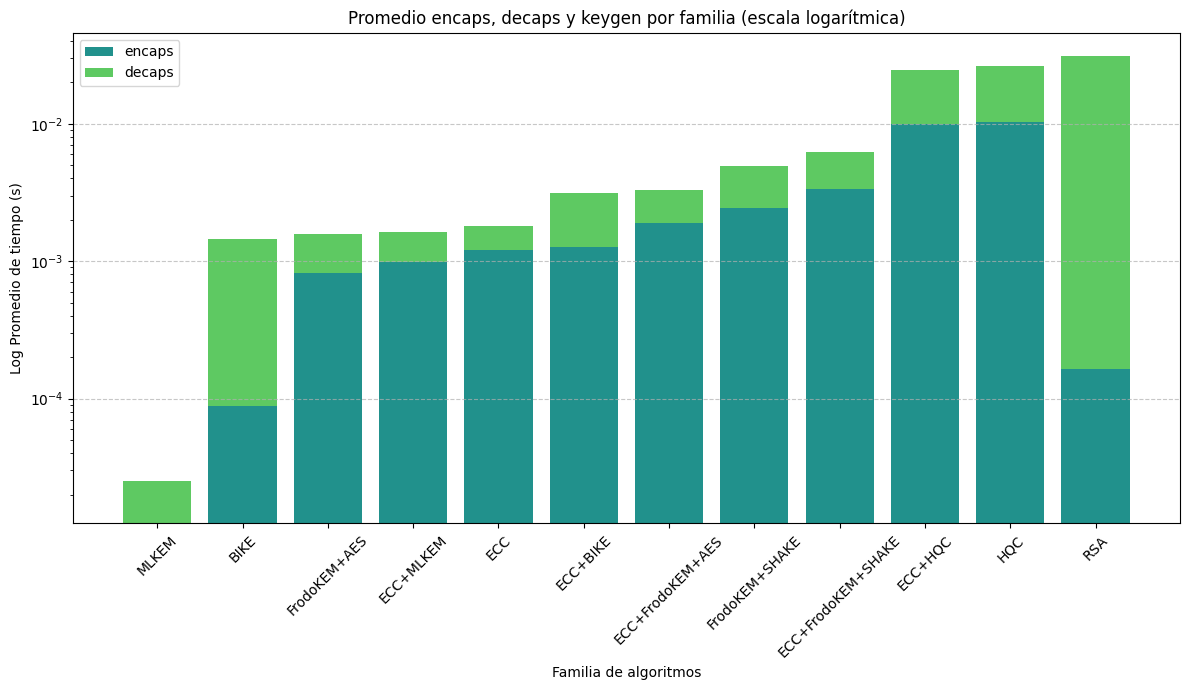

In [69]:
# Promedios ya calculados para encaps, decaps y keygen
encaps_avg = df_kem.groupby('Familia')['encaps'].mean()
decaps_avg = df_kem.groupby('Familia')['decaps'].mean()
keygen_avg = df_kem.groupby('Familia')['keygen'].mean()

# Crear DataFrame con los promedios
df_stacked = pd.DataFrame({
    'encaps': encaps_avg,
    'decaps': decaps_avg
}).fillna(0)

# Calcular total para ordenar y apilar
df_stacked['total'] = df_stacked.sum(axis=1)
df_stacked = df_stacked.sort_values('total')

familias = df_stacked.index
encaps = df_stacked['encaps'].values
decaps = df_stacked['decaps'].values

x = np.arange(len(familias))

# Obtener 3 colores de la paleta viridis
palette = sns.color_palette('viridis', 3)

plt.figure(figsize=(12, 7))

plt.bar(x, encaps, label='encaps', color=palette[1])
plt.bar(x, decaps, bottom=encaps, label='decaps', color=palette[2])

plt.xticks(x, familias, rotation=45)
plt.ylabel('Log Promedio de tiempo (s)')
plt.xlabel('Familia de algoritmos')
plt.title('Promedio encaps, decaps y keygen por familia (escala logarítmica)')
plt.legend()
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Bits de seguridad.

In [70]:
import numpy as np

def seguridad_bike(algoritmo):
    if pd.isna(algoritmo):
        return np.nan
    algoritmo = algoritmo.lower()
    if 'bikel1' in algoritmo:
        return 128
    elif 'bikel3' in algoritmo:
        return 192
    elif 'bikel5' in algoritmo:
        return 256
    else:
        return np.nan

def seguridad_hqc(algoritmo):
    if pd.isna(algoritmo):
        return np.nan
    algoritmo = algoritmo.lower()
    if 'hqc128' in algoritmo:
        return 128
    elif 'hqc192' in algoritmo:
        return 192
    elif 'hqc256' in algoritmo:
        return 256
    else:
        return np.nan

def seguridad_frodo(algoritmo):
    if pd.isna(algoritmo):
        return np.nan
    algoritmo = algoritmo.lower()
    if 'frodo' not in algoritmo:
        return np.nan
    if '640' in algoritmo:
        return 128
    elif '976' in algoritmo:
        return 192
    elif '1344' in algoritmo:
        return 256
    else:
        return np.nan

def seguridad_mlkem(algoritmo):
    if pd.isna(algoritmo):
        return np.nan
    algoritmo = algoritmo.lower()
    if 'mlkem512' in algoritmo:
        return 128
    elif 'mlkem768' in algoritmo:
        return 192
    elif 'mlkem1024' in algoritmo:
        return 256
    else:
        return np.nan

def seguridad_rsa_por_bits(bits):
    mapa_rsa = {
        512: 80,
        1024: 80,
        2048: 112,
        3072: 128,
        4096: 140,   # añadido
        7680: 192,
        15360: 256
    }
    return mapa_rsa.get(bits, np.nan)

def seguridad_ecc_por_bits(bits):
    mapa_ecc = {
        255: 128,  # x25519
        256: 128,  # ecp-256
        384: 192,  # ecp-384
        448: 224,  # x448
        521: 256   # ecp-521
    }
    return mapa_ecc.get(bits, np.nan)

def asignar_bits_seguridad(row):
    fam = row['Familia'].upper() if pd.notna(row['Familia']) else ''
    principal = row['AlgoritmoPrincipal'].upper() if pd.notna(row['AlgoritmoPrincipal']) else ''
    alg = row['Algoritmo']
    bits = row['Bits']

    if principal == 'FRODOKEM':
        return seguridad_frodo(alg)
    elif principal == 'MLKEM':
        return seguridad_mlkem(alg)
    elif principal == 'BIKE':
        return seguridad_bike(alg)
    elif principal == 'HQC':
        return seguridad_hqc(alg)
    elif fam == 'RSA':
        return seguridad_rsa_por_bits(bits)
    elif fam == 'ECC':
        return seguridad_ecc_por_bits(bits)
    elif fam == 'ECC+BIKE':
        b = seguridad_bike(alg)
        if not pd.isna(b):
            return b
        else:
            return seguridad_ecc_por_bits(bits)
    else:
        return np.nan

df_kem['Bits de seguridad AES'] = df_kem.apply(asignar_bits_seguridad, axis=1)


In [71]:
df_kem = df_kem[~df_kem['Familia'].isin(['Kyber', 'ECC+Kyber'])].reset_index(drop=True)

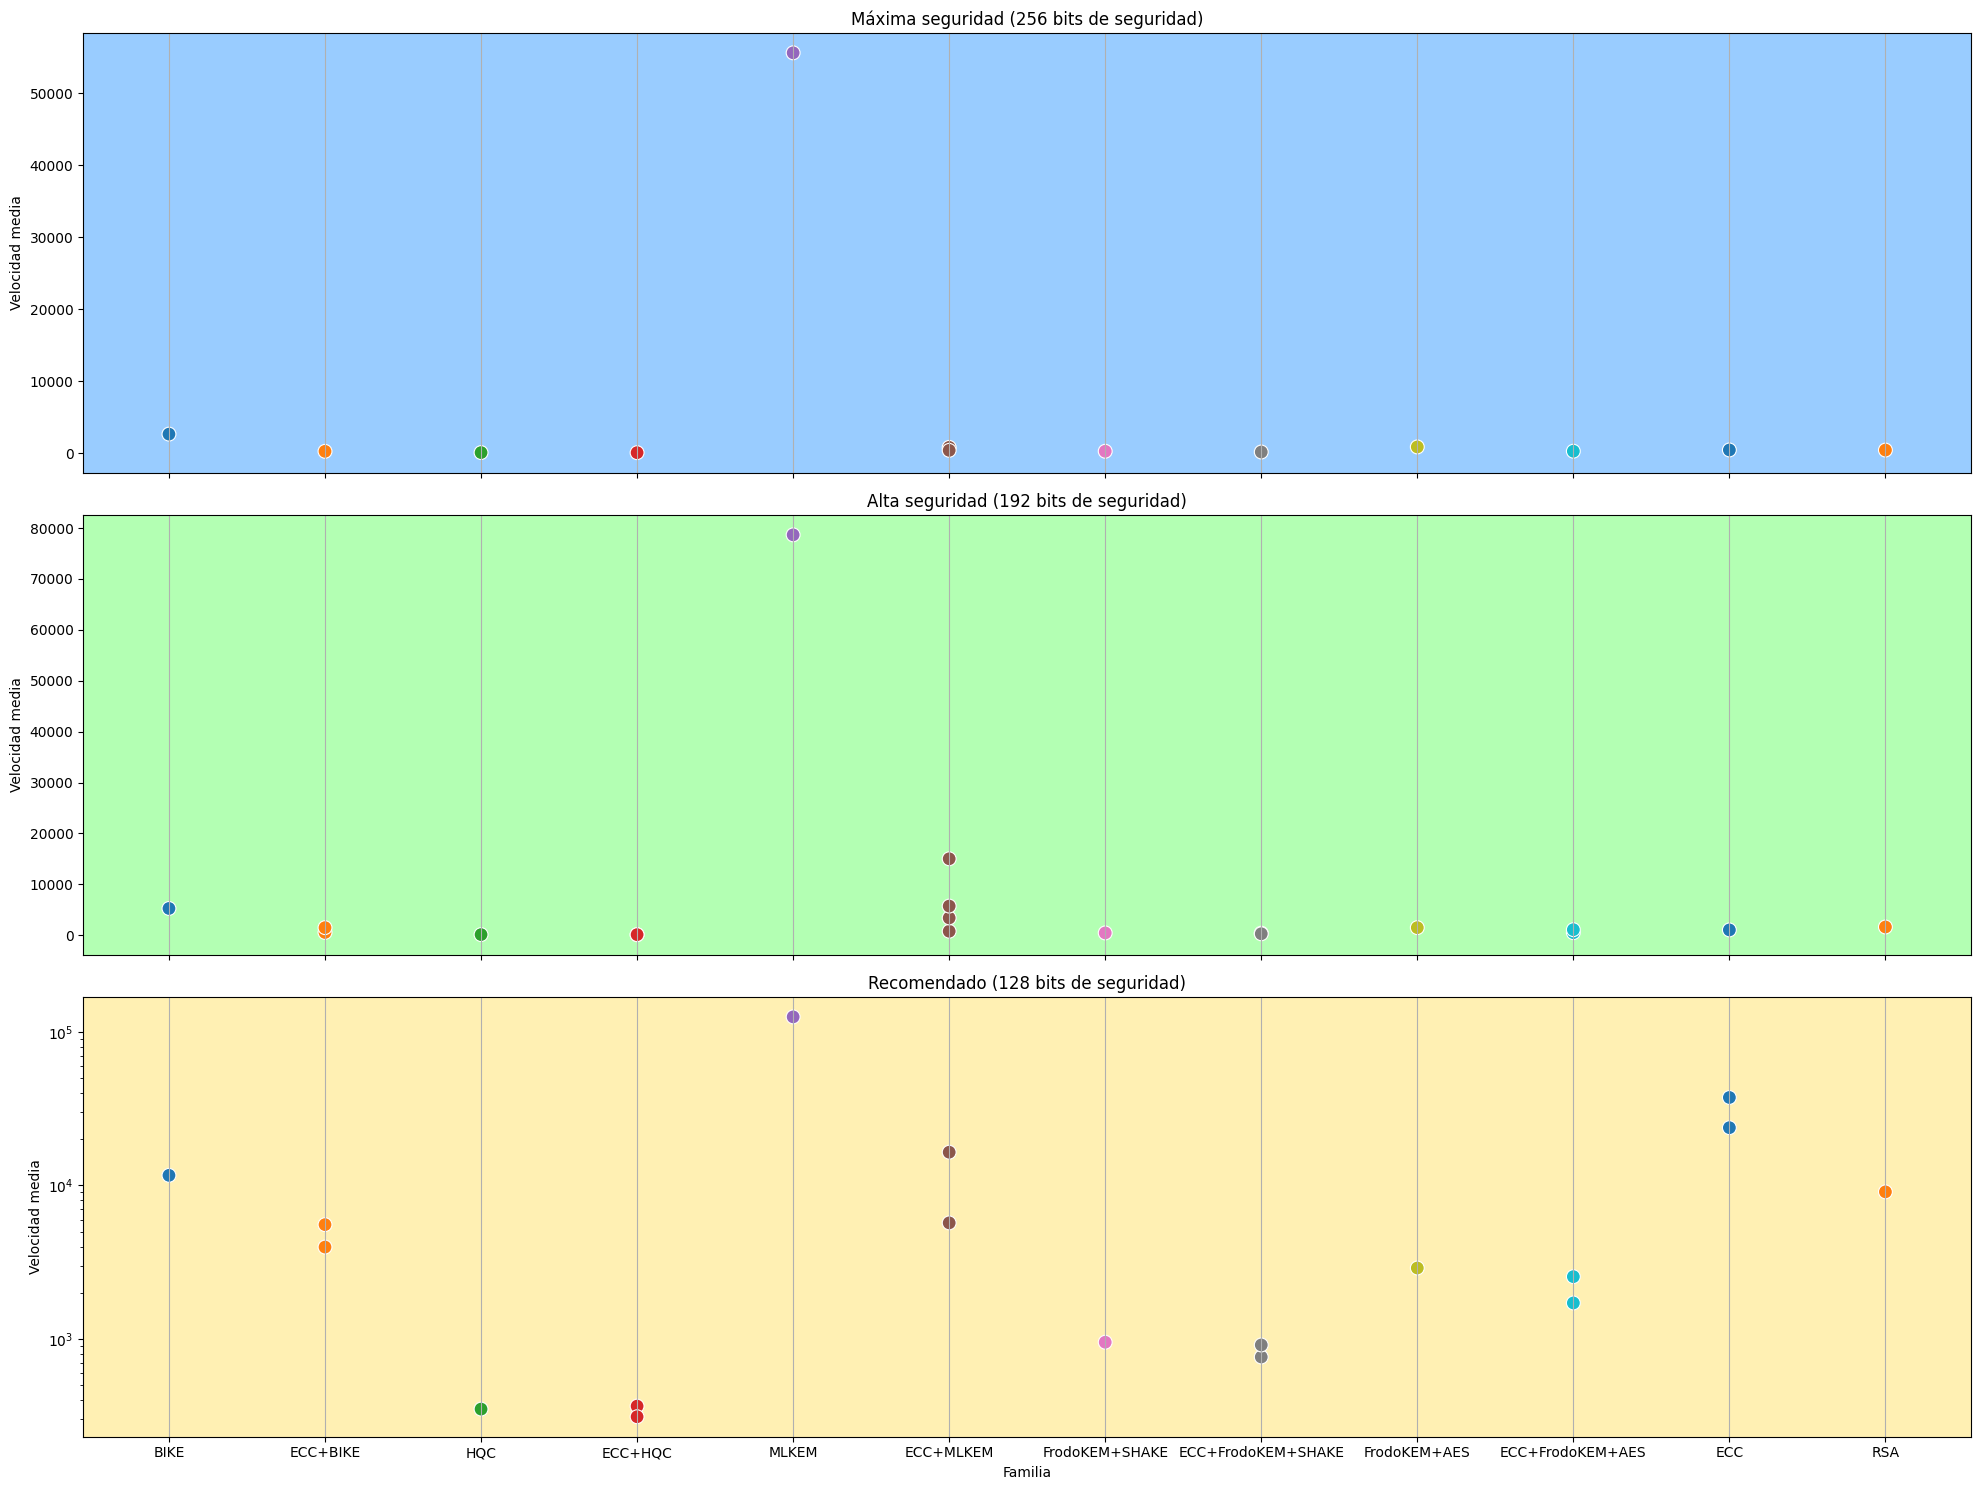

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Calcular velocidad media
df_kem['Velocidad media'] = df_kem[['keygens/s', 'encaps/s', 'decaps/s']].mean(axis=1)

# Función para clasificar nivel de seguridad
def nivel_seguridad(bits):
    if bits == 128:
        return 'Recomendado (128 bits de seguridad)'
    elif bits == 192:
        return 'Alta seguridad (192 bits de seguridad)'
    elif bits == 256:
        return 'Máxima seguridad (256 bits de seguridad)'
    else:
        return None

# Aplicar y filtrar solo niveles deseados
df_kem['Nivel Seguridad'] = df_kem['Bits de seguridad AES'].apply(nivel_seguridad)
df_filtrado = df_kem[df_kem['Nivel Seguridad'].notna()].copy()

# Definir orden personalizado para la familia
orden_familia = [
    'BIKE', 'ECC+BIKE', 'HQC', 'ECC+HQC', 'MLKEM', 'ECC+MLKEM',
    'FrodoKEM+SHAKE', 'ECC+FrodoKEM+SHAKE', 'FrodoKEM+AES', 'ECC+FrodoKEM+AES',
    'ECC', 'RSA'
]
df_filtrado['Familia'] = pd.Categorical(df_filtrado['Familia'], categories=orden_familia, ordered=True)

# Definir niveles y colores de fondo
niveles = [
    'Máxima seguridad (256 bits de seguridad)',
    'Alta seguridad (192 bits de seguridad)',
    'Recomendado (128 bits de seguridad)'
]

colores_fondo = {
    'Máxima seguridad (256 bits de seguridad)': '#99ccff',  # azul claro
    'Alta seguridad (192 bits de seguridad)': '#b3ffb3',    # verde claro
    'Recomendado (128 bits de seguridad)': '#fff0b3'        # amarillo claro
}

# Crear subgráficos (3 filas para 3 niveles)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15), sharex=True)

for ax, nivel in zip(axes, niveles):
    df_sub = df_filtrado[df_filtrado['Nivel Seguridad'] == nivel]

    # Color de fondo
    ax.set_facecolor(colores_fondo[nivel])

    # Scatter plot
    sns.scatterplot(
        data=df_sub,
        x='Familia',
        y='Velocidad media',
        hue='Familia',
        palette='tab10',
        s=100,
        ax=ax,
        legend=False
    )

    ax.set_title(nivel)
    ax.grid(True, axis='x')

axes[-1].set_xlabel("Familia")
plt.tight_layout()
plt.yscale('log')
plt.show()


# EXPORTACIÓN DE DATOS PROCESADOS.

In [73]:
df_kem_export = df_kem[['Algoritmo', 'keygen', 'encaps', 'decaps', 'keygens/s', 'encaps/s', 'decaps/s', 'Tiempo total', 'Familia', 'AlgoritmoPrincipal', 'Bits de seguridad AES', 'Velocidad media']]

df_kem_export.to_excel('kem_processed.xlsx', index=False)
